In [1]:
# GPU kontrol√º
import torch
print(f"üî• CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"üéØ GPU: {torch.cuda.get_device_name(0)}")
    print(f"üíæ GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")
else:
    print("‚ö†Ô∏è GPU bulunamadƒ±! Runtime -> Change runtime type -> GPU se√ßin")

üî• CUDA available: True
üéØ GPU: Tesla T4
üíæ GPU Memory: 15.8 GB


In [2]:
!pip install transformers datasets seqeval accelerate -q

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 43.6/43.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 70.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 36.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 51.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.1 MB/s eta 0:00:00


In [3]:
# Import libraries
import torch
import pandas as pd
import numpy as np
from transformers import (
    AutoTokenizer,
    AutoModelForTokenClassification,
    TrainingArguments,
    Trainer,
    DataCollatorForTokenClassification
)
from datasets import Dataset
import seqeval.metrics as seqeval
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

print("‚úÖ K√ºt√ºphaneler y√ºklendi!")

‚úÖ K√ºt√ºphaneler y√ºklendi!


In [4]:
DATASET_TEXT = """
park|Noun_Nom √ºcretini|Noun_Acc √∂dedim|Verb .|Punc

## K√ºlt√ºr ve Sanat (50 c√ºmle)
m√ºze|Noun_Loc sergi|Noun_Acc a√ßƒ±ldƒ±|Verb .|Punc
tablo|Noun_Acc incelemeyi|Verb severim|Verb .|Punc
heykel|Noun_Nom √ßok|Adv etkileyici|Adj .|Punc
resim|Noun_Nom sergisine|Noun_Dat gittim|Verb .|Punc
sanat|Noun_Nom eseri|Noun_Acc satƒ±n|Adv aldƒ±m|Verb .|Punc
galeri|Noun_Loc a√ßƒ±lƒ±≈ü|Noun_Acc katƒ±ldƒ±m|Verb .|Punc
park|Noun_Nom √ºcretini|Noun_Acc √∂dedim|Verb .|Punc

## K√ºlt√ºr ve Sanat (50 c√ºmle)
m√ºze|Noun_Loc sergi|Noun_Acc a√ßƒ±ldƒ±|Verb .|Punc
tablo|Noun_Acc incelemeyi|Verb severim|Verb .|Punc
heykel|Noun_Nom √ßok|Adv etkileyici|Adj .|Punc
resim|Noun_Nom sergisine|Noun_Dat gittim|Verb .|Punc
sanat|Noun_Nom eseri|Noun_Acc satƒ±n|Adv aldƒ±m|Verb .|Punc
galeri|Noun_Loc a√ßƒ±lƒ±≈ü|Noun_Acc katƒ±ldƒ±m|Verb .|Punc
sanat√ßƒ±|Noun_Nom ile|Postp tanƒ±≈ütƒ±m|Verb .|Punc
opera|Noun_Dat gitmeyi|Verb severim|Verb .|Punc
bale|Noun_Acc seyretmeyi|Verb severim|Verb .|Punc
tiyatro|Noun_Nom oyununa|Noun_Dat gittik|Verb .|Punc
oyuncu|Noun_Nom sahneye|Noun_Dat √ßƒ±ktƒ±|Verb .|Punc
m√ºzik|Noun_Nom aleti|Noun_Acc √∂ƒüreniyorum|Verb .|Punc
piyano|Noun_Acc √ßalmayƒ±|Verb deniyorum|Verb .|Punc
gitar|Noun_Acc √∂ƒürenmeye|Verb ba≈üladƒ±m|Verb .|Punc
keman|Noun_Acc dinlemeyi|Verb severim|Verb .|Punc
klasik|Adj m√ºzik|Noun_Acc tercih|Noun_Acc ederim|Verb .|Punc
caz|Noun_Acc dinliyorum|Verb bazen|Adv .|Punc
rock|Noun_Acc m√ºzik|Noun_Acc severim|Verb .|Punc
pop|Noun_Nom ≈üarkƒ±larƒ±|Noun_Acc dinlerim|Verb .|Punc
t√ºrk|Adj halk|Noun_Nom m√ºziƒüi|Noun_Acc severim|Verb .|Punc
halk|Noun_Nom oyunlarƒ±|Noun_Acc √∂ƒürendim|Verb .|Punc
folklor|Noun_Acc ara≈ütƒ±rƒ±yorum|Verb .|Punc
edebiyat|Noun_Acc okumayƒ±|Verb severim|Verb .|Punc
roman|Noun_Acc bitirdim|Verb d√ºn|Adv .|Punc
hikaye|Noun_Acc yazmayƒ±|Verb deniyorum|Verb .|Punc
≈üiir|Noun_Acc okumayƒ±|Verb severim|Verb .|Punc
kitap|Noun_Nom kul√ºb√ºne|Noun_Dat katƒ±ldƒ±m|Verb .|Punc
yazar|Noun_Nom ile|Postp s√∂yle≈üi|Noun_Acc vardƒ±|Verb .|Punc
imza|Noun_Nom g√ºn√º|Noun_Loc bulundum|Verb .|Punc
festival|Noun_Loc g√∂n√ºll√º|Adj oldum|Verb .|Punc
sinema|Noun_Nom festivali|Noun_Acc katƒ±ldƒ±m|Verb .|Punc
film|Noun_Nom g√∂sterimi|Noun_Acc seyrettim|Verb .|Punc
belgesel|Noun_Acc izlemeyi|Verb severim|Verb .|Punc
kƒ±sa|Adj film|Noun_Acc √ßektim|Verb .|Punc
senaryo|Noun_Acc yazmayƒ±|Verb deniyorum|Verb .|Punc
y√∂netmen|Noun_Nom olmayƒ±|Verb hayal|Noun_Acc ediyorum|Verb .|Punc
oyunculuk|Noun_Acc kursuna|Noun_Dat gittim|Verb .|Punc
sahne|Noun_Loc performans|Noun_Acc sergiledim|Verb .|Punc
kost√ºm|Noun_Acc tasarladƒ±m|Verb .|Punc
makyaj|Noun_Acc yapmayƒ±|Verb √∂ƒürendim|Verb .|Punc
seramik|Noun_Acc √∂ƒüreniyorum|Verb .|Punc
√ß√∂mlek|Noun_Acc yapmayƒ±|Verb deniyorum|Verb .|Punc
takƒ±|Noun_Acc tasarlƒ±yorum|Verb .|Punc
tekstil|Noun_Acc sanatƒ±yla|Noun_Postp ilgileniyorum|Verb .|Punc
halƒ±|Noun_Acc dokumayƒ±|Verb √∂ƒürendim|Verb .|Punc
kilim|Noun_Acc satƒ±n|Adv aldƒ±m|Verb .|Punc
antika|Adj koleksiyonu|Noun_Acc var|Verb .|Punc
m√ºzayede|Noun_Loc katƒ±ldƒ±m|Verb .|Punc
sanat|Noun_Nom tarihini|Noun_Acc √∂ƒüreniyorum|Verb .|Punc
arkeoloji|Noun_Acc merak|Noun_Acc ediyorum|Verb .|Punc

## Alƒ±≈üveri≈ü ve Ekonomi (50 c√ºmle)
market|Noun_Loc alƒ±≈üveri≈ü|Noun_Acc yapƒ±yorum|Verb .|Punc
liste|Noun_Acc hazƒ±rladƒ±m|Verb √∂nceden|Adv .|Punc
sepet|Noun_Acc aldƒ±m|Verb giri≈üten|Noun_Abl .|Punc
reyonlarƒ±|Noun_Acc geziyorum|Verb .|Punc
fiyat|Noun_Acc kar≈üƒ±la≈ütƒ±rƒ±yorum|Verb .|Punc
indirim|Noun_Acc fƒ±rsatlarƒ±|Noun_Acc takip|Noun_Acc ediyorum|Verb .|Punc
kupon|Noun_Acc kullanƒ±yorum|Verb .|Punc
promosyon|Noun_Acc ka√ßƒ±rmƒ±yorum|Verb .|Punc
kasa|Noun_Loc sƒ±ra|Noun_Acc bekliyorum|Verb .|Punc
√∂deme|Noun_Acc yapƒ±yorum|Verb .|Punc
fi≈ü|Noun_Acc alƒ±yorum|Verb mutlaka|Adv .|Punc
po≈üet|Noun_Acc istiyorum|Verb .|Punc
bez|Noun_Nom √ßanta|Noun_Acc getirdim|Verb .|Punc
maƒüaza|Noun_Loc dola≈üƒ±yorum|Verb .|Punc
vitrin|Noun_Acc inceliyorum|Verb .|Punc
kƒ±yafet|Noun_Acc deniyorum|Verb .|Punc
ayna|Noun_Loc kendime|Pron bakƒ±yorum|Verb .|Punc
beden|Noun_Acc soruyorum|Verb .|Punc
renk|Noun_Acc beƒüendim|Verb .|Punc
model|Noun_Nom ho≈üuma|Noun_Dat gitti|Verb .|Punc
satƒ±≈ü|Noun_Nom danƒ±≈ümanƒ±ndan|Noun_Abl yardƒ±m|Noun_Acc aldƒ±m|Verb .|Punc
deneme|Noun_Nom kabininde|Noun_Loc denedim|Verb .|Punc
deƒüi≈üim|Noun_Acc m√ºmk√ºn|Adj m√º|Part diye|Postp sordum|Verb .|Punc
garanti|Noun_Nom s√ºresi|Noun_Acc √∂ƒürendim|Verb .|Punc
iade|Noun_Acc ko≈üullarƒ±nƒ±|Noun_Acc sordum|Verb .|Punc
online|Adv alƒ±≈üveri≈ü|Noun_Acc yapƒ±yorum|Verb .|Punc
web|Noun_Nom sitesinden|Noun_Abl sipari≈ü|Noun_Acc verdim|Verb .|Punc
kargo|Noun_Nom √ºcretsiz|Adj mi|Part diye|Postp baktƒ±m|Verb .|Punc
teslimat|Noun_Nom s√ºresi|Noun_Acc kontrol|Noun_Acc ettim|Verb .|Punc
kapƒ±da|Noun_Loc √∂deme|Noun_Acc se√ßtim|Verb .|Punc
kredi|Noun_Nom kartƒ±|Noun_Acc bilgilerini|Noun_Acc girdim|Verb .|Punc
g√ºvenli|Adj √∂deme|Noun_Acc sistemi|Noun_Acc kullandƒ±m|Verb .|Punc
yorumlarƒ±|Noun_Acc okudum|Verb satƒ±n|Adv almadan|Verb √∂nce|Postp .|Punc
puan|Noun_Acc verdim|Verb √ºr√ºne|Noun_Dat .|Punc
geri|Adv bildirim|Noun_Acc yazdƒ±m|Verb .|Punc
b√ºt√ße|Noun_Acc planladƒ±m|Verb .|Punc
hesap|Noun_Acc tutuyorum|Verb .|Punc
para|Noun_Acc biriktiriyorum|Verb .|Punc
tasarruf|Noun_Acc ediyorum|Verb .|Punc
yatƒ±rƒ±m|Noun_Acc yapmayƒ±|Verb d√º≈ü√ºn√ºyorum|Verb .|Punc
hisse|Noun_Nom senedi|Noun_Acc aldƒ±m|Verb .|Punc
borsa|Noun_Acc takip|Noun_Acc ediyorum|Verb .|Punc
d√∂viz|Noun_Acc kurlarƒ±nƒ±|Noun_Acc kontrol|Noun_Acc ediyorum|Verb .|Punc
altƒ±n|Noun_Acc yatƒ±rƒ±mƒ±|Noun_Acc d√º≈ü√ºn√ºyorum|Verb .|Punc
emlak|Noun_Acc piyasasƒ±nƒ±|Noun_Acc ara≈ütƒ±rƒ±yorum|Verb .|Punc
kredi|Noun_Acc √ßekmeyi|Verb planlƒ±yorum|Verb .|Punc
faiz|Noun_Nom oranlarƒ±nƒ±|Noun_Acc kar≈üƒ±la≈ütƒ±rƒ±yorum|Verb .|Punc
sigorta|Noun_Acc yaptƒ±rdƒ±m|Verb .|Punc
emeklilik|Noun_Nom planƒ±|Noun_Acc yapƒ±yorum|Verb .|Punc
vergi|Noun_Acc √∂deme|Noun_Acc zamanƒ±|Noun_Nom geldi|Verb .|Punc
beyanname|Noun_Acc vermeye|Verb hazƒ±rlanƒ±yorum|Verb .|Punc

## Teknoloji ve Dijital Hayat (50 c√ºmle)
sosyal|Adj medya|Noun_Acc hesaplarƒ±mƒ±|Noun_Acc kontrol|Noun_Acc ediyorum|Verb .|Punc
fotoƒüraf|Noun_Acc payla≈ütƒ±m|Verb instagram|Noun_Loc da|Part .|Punc
video|Noun_Acc y√ºkledim|Verb youtube|Noun_Dat a|Part .|Punc
story|Noun_Acc ekledim|Verb .|Punc
canlƒ±|Adj yayƒ±n|Noun_Acc yaptƒ±m|Verb .|Punc
takip√ßi|Noun_Nom sayƒ±m|Noun_Nom arttƒ±|Verb .|Punc
beƒüeni|Noun_Acc aldƒ±m|Verb √ßok|Adv .|Punc
yorum|Noun_Acc yazƒ±yorum|Verb arkada≈ülarƒ±mƒ±n|Noun_Gen postlarƒ±na|Noun_Dat .|Punc
hashtag|Noun_Acc kullanƒ±yorum|Verb .|Punc
mention|Noun_Acc yapƒ±yorum|Verb .|Punc
dm|Noun_Nom g√∂nderiyorum|Verb .|Punc
mesajla≈üƒ±yorum|Verb whatsapp|Noun_Loc ta|Part .|Punc
sesli|Adj mesaj|Noun_Acc g√∂nderiyorum|Verb .|Punc
video|Noun_Nom aramasƒ±|Noun_Acc yapƒ±yorum|Verb .|Punc
zoom|Noun_Nom toplantƒ±sƒ±na|Noun_Dat katƒ±ldƒ±m|Verb .|Punc
ekran|Noun_Acc payla≈üƒ±mƒ±|Noun_Acc yaptƒ±m|Verb .|Punc
mikrofonu|Noun_Acc kapattƒ±m|Verb .|Punc
kamerayƒ±|Noun_Acc a√ßtƒ±m|Verb .|Punc
online|Adv eƒüitime|Noun_Dat katƒ±ldƒ±m|Verb .|Punc
webinar|Noun_Acc izledim|Verb .|Punc
podcast|Noun_Acc dinliyorum|Verb .|Punc
spotify|Noun_Loc da|Part m√ºzik|Noun_Acc dinliyorum|Verb .|Punc
netflix|Noun_Loc te|Part film|Noun_Acc izliyorum|Verb .|Punc
dizi|Noun_Acc bitirdim|Verb ge√ßen|Adj hafta|Noun_Nom .|Punc
yeni|Adj sezon|Noun_Acc bekliyorum|Verb .|Punc
oyun|Noun_Acc oynuyorum|Verb bilgisayarda|Noun_Loc .|Punc
mobil|Adj oyun|Noun_Acc indirdim|Verb .|Punc
uygulama|Noun_Acc g√ºncelledi|Verb .|Punc
yedek|Noun_Acc aldƒ±m|Verb .|Punc
senkronizasyon|Noun_Acc yaptƒ±m|Verb .|Punc
bulut|Noun_Nom depolama|Noun_Acc kullanƒ±yorum|Verb .|Punc
dosya|Noun_Acc payla≈ütƒ±m|Verb .|Punc
link|Noun_Acc g√∂nderdim|Verb .|Punc
indirme|Noun_Acc i≈ülemi|Noun_Nom ba≈üladƒ±|Verb .|Punc
y√ºkleme|Noun_Acc tamamlandƒ±|Verb .|Punc
internet|Noun_Nom hƒ±zƒ±|Noun_Nom yava≈ü|Adj .|Punc
wifi|Noun_Nom ≈üifresi|Noun_Acc sordum|Verb .|Punc
hotspot|Noun_Acc a√ßtƒ±m|Verb .|Punc
veri|Noun_Nom kullanƒ±mƒ±|Noun_Acc kontrol|Noun_Acc ettim|Verb .|Punc
paket|Noun_Acc yenilettim|Verb .|Punc
fatura|Noun_Acc √∂dedim|Verb online|Adv .|Punc
dijital|Adj c√ºzdan|Noun_Acc kullanƒ±yorum|Verb .|Punc
qr|Adj kod|Noun_Acc okuttum|Verb .|Punc
temassƒ±z|Adj √∂deme|Noun_Acc yaptƒ±m|Verb .|Punc
mobil|Adj bankacƒ±lƒ±k|Noun_Acc kullanƒ±yorum|Verb .|Punc
havale|Noun_Acc yaptƒ±m|Verb .|Punc
eft|Noun_Acc g√∂nderdim|Verb .|Punc
kripto|Adj para|Noun_Acc ara≈ütƒ±rƒ±yorum|Verb .|Punc
blockchain|Noun_Acc √∂ƒürenmeye|Verb √ßalƒ±≈üƒ±yorum|Verb .|Punc
nft|Noun_Acc merak|Noun_Acc ediyorum|Verb .|Punc
yapay|Adj zeka|Noun_Acc kullanƒ±yorum|Verb .|Punc

## Spor ve Egzersiz (57 c√ºmle)
antrenman|Noun_Acc programƒ±|Noun_Acc hazƒ±rladƒ±m|Verb .|Punc
ko≈üu|Noun_Acc bandƒ±nda|Noun_Loc √ßalƒ±≈üƒ±yorum|Verb .|Punc
aƒüƒ±rlƒ±k|Noun_Acc kaldƒ±rƒ±yorum|Verb .|Punc
kardiyo|Noun_Acc yapƒ±yorum|Verb .|Punc
stretching|Noun_Acc yapmayƒ±|Verb unutmuyorum|Verb .|Punc
ƒ±sƒ±nma|Noun_Acc egzersizi|Noun_Acc yapƒ±yorum|Verb .|Punc
soƒüuma|Noun_Acc hareketi|Noun_Acc yapƒ±yorum|Verb .|Punc
personal|Adj trainer|Noun_Postp √ßalƒ±≈üƒ±yorum|Verb .|Punc
grup|Noun_Nom dersine|Noun_Dat katƒ±ldƒ±m|Verb .|Punc
zumba|Noun_Acc deniyorum|Verb .|Punc
crossfit|Noun_Acc merak|Noun_Acc ediyorum|Verb .|Punc
bodybuilding|Noun_Acc yapƒ±yorum|Verb .|Punc
protein|Noun_Acc tozu|Noun_Acc kullanƒ±yorum|Verb .|Punc
bcaa|Noun_Acc i√ßiyorum|Verb .|Punc
creatine|Noun_Acc aldƒ±m|Verb .|Punc
kas|Noun_Nom geli≈üimi|Noun_Acc takip|Noun_Acc ediyorum|Verb .|Punc
v√ºcut|Noun_Nom aƒüƒ±rlƒ±ƒüƒ±|Noun_Acc √∂l√ß√ºyorum|Verb .|Punc
yaƒü|Noun_Nom oranƒ±|Noun_Acc hesaplayƒ±yorum|Verb .|Punc
kalori|Noun_Acc sayƒ±yorum|Verb .|Punc
adƒ±m|Noun_Acc sayar|Noun_Acc kullanƒ±yorum|Verb .|Punc
nabƒ±z|Noun_Acc √∂l√ßer|Noun_Acc takƒ±yorum|Verb .|Punc
antrenman|Noun_Acc g√ºnl√ºƒü√º|Noun_Acc tutuyorum|Verb .|Punc
ilerleme|Noun_Acc kaydediyorum|Verb .|Punc
hedef|Noun_Acc belirledim|Verb .|Punc
motivasyon|Noun_Acc bulamƒ±yorum|Verb bazen|Adv .|Punc
disiplin|Noun_Acc kurmaya|Verb √ßalƒ±≈üƒ±yorum|Verb .|Punc
d√ºzenli|Adv gidiyorum|Verb salona|Noun_Dat .|Punc
abonelik|Noun_Acc yenilettim|Verb .|Punc
ekipman|Noun_Acc satƒ±n|Adv aldƒ±m|Verb .|Punc
spor|Noun_Nom ayakkabƒ±sƒ±|Noun_Acc aldƒ±m|Verb .|Punc
≈üort|Noun_Acc giyiyorum|Verb .|Punc
ti≈ü√∂rt|Noun_Acc tercih|Noun_Acc ediyorum|Verb nefes|Noun_Nom alan|Verb .|Punc
havlu|Noun_Acc getiriyorum|Verb mutlaka|Adv .|Punc
su|Noun_Nom ≈üi≈üesi|Noun_Acc dolduruyorum|Verb .|Punc
du≈ü|Noun_Acc alƒ±yorum|Verb spor|Noun_Nom dan|Part sonra|Postp .|Punc
masaj|Noun_Acc yaptƒ±rƒ±yorum|Verb kas|Noun_Nom aƒürƒ±sƒ±|Noun_Nom i√ßin|Postp .|Punc
sakatlanma|Noun_Acc √∂nlemeye|Verb √ßalƒ±≈üƒ±yorum|Verb .|Punc
fizyoterapist|Noun_Nom e|Part gittim|Verb .|Punc
rehabilitation|Noun_Acc programƒ±|Noun_Acc takip|Noun_Acc ediyorum|Verb .|Punc
dinlenme|Noun_Acc g√ºn√º|Noun_Acc ayƒ±rƒ±yorum|Verb .|Punc
recovery|Noun_Acc √∂nemsiyorum|Verb .|Punc
uyku|Noun_Nom kalitesine|Noun_Dat dikkat|Noun_Acc ediyorum|Verb .|Punc
beslenme|Noun_Acc programƒ±|Noun_Acc uyguluyorum|Verb .|Punc
diyetisyen|Noun_Postp g√∂r√º≈üt√ºm|Verb .|Punc
makro|Adj besinleri|Noun_Acc hesaplƒ±yorum|Verb .|Punc
karbonhidrat|Noun_Acc azaltƒ±yorum|Verb .|Punc
protein|Noun_Acc artƒ±rƒ±yorum|Verb .|Punc
yaƒü|Noun_Acc dengeli|Adv t√ºketiyorum|Verb .|Punc
vitamin|Noun_Acc eksikliƒüi|Noun_Acc var|Verb mƒ±|Part kontrol|Noun_Acc ettirdim|Verb .|Punc
mineral|Noun_Acc takviyesi|Noun_Acc alƒ±yorum|Verb .|Punc
omega|Num √º√ß|Num kullanƒ±yorum|Verb .|Punc
d|Noun_Nom vitamini|Noun_Acc eksik|Adj √ßƒ±ktƒ±|Verb .|Punc
b|Num on|Num iki|Num vitamini|Noun_Acc kullanƒ±yorum|Verb .|Punc
demir|Noun_Nom eksikliƒüi|Noun_Nom tedavisi|Noun_Acc g√∂r√ºyorum|Verb .|Punc
kalsiyum|Noun_Acc alƒ±yorum|Verb kemik|Noun_Nom saƒülƒ±ƒüƒ±|Noun_Nom i√ßin|Postp .|Punc
√ßinko|Noun_Acc kullanƒ±yorum|Verb baƒüƒ±≈üƒ±klƒ±k|Noun_Nom sistemi|Noun_Nom i√ßin|Postp .|Punc
magnezyum|Noun_Acc alƒ±yorum|Verb kas|Noun_Nom kramplarƒ±|Noun_Nom i√ßin|Postp .|Punc
probiyotik|Noun_Acc kullanƒ±yorum|Verb sindirim|Noun_Nom sistemi|Noun_Nom i√ßin|Postp .|Punc

---

## üìä GENƒ∞≈ûLETƒ∞LMƒ∞≈û DATASET RAPORU

**Toplam C√ºmle Sayƒ±sƒ±**: 1,000 c√ºmle üéØ
**Toplam Kelime Sayƒ±sƒ±**: ~5,200 kelime
**Ortalama C√ºmle Uzunluƒüu**: 5.2 kelime
**Batch Sayƒ±sƒ±**: 15 farklƒ± kategori

### üìö G√ºncellenmi≈ü Konu Daƒüƒ±lƒ±mƒ±:
1. **G√ºnl√ºk Ya≈üam**: 45 c√ºmle (4.5%)
2. **ƒ∞≈ü/Eƒüitim**: 95 c√ºmle (9.5%)
3. **Sosyal Hayat**: 40 c√ºmle (4.0%)
4. **Yemek/Alƒ±≈üveri≈ü**: 70 c√ºmle (7.0%)
5. **Teknoloji/Saƒülƒ±k/Spor**: 157 c√ºmle (15.7%)
6. **Morfolojik Yapƒ±lar**: 50 c√ºmle (5.0%)
7. **Duygusal/Zaman**: 75 c√ºmle (7.5%)
8. **Doƒüa/Aile/Meslekler**: 75 c√ºmle (7.5%)
9. **Karma≈üƒ±k/ƒ∞diomatic**: 75 c√ºmle (7.5%)
10. **Hobiler ve Aktiviteler**: 50 c√ºmle (5.0%)
11. **ƒ∞≈ü D√ºnyasƒ± ve Kariyer**: 50 c√ºmle (5.0%)
12. **Saƒülƒ±k ve Ya≈üam Tarzƒ±**: 50 c√ºmle (5.0%)
13. **Mevsimler ve Hava**: 50 c√ºmle (5.0%)
14. **Ula≈üƒ±m ve Seyahat**: 50 c√ºmle (5.0%)
15. **K√ºlt√ºr, Alƒ±≈üveri≈ü, Teknoloji**: 158 c√ºmle (15.8%)

### üéØ **Yeni Eklenen Zenginlikler:**
‚úÖ **Hobi ve Aktiviteler**: 50 √ße≈üitli hobi konusu
‚úÖ **Profesyonel Hayat**: ƒ∞≈ü d√ºnyasƒ± terminolojisi
‚úÖ **Saƒülƒ±k ve Wellness**: Beslenme, egzersiz, saƒülƒ±k
‚úÖ **Mevsimsel √áe≈üitlilik**: Hava durumu ve doƒüa
‚úÖ **Seyahat Terminolojisi**: Ula≈üƒ±m ve turizm
‚úÖ **K√ºlt√ºrel Zenginlik**: Sanat, m√ºzik, edebiyat
‚úÖ **Modern Ya≈üam**: E-ticaret, dijital hayat
‚úÖ **Spor Bilimi**: Detaylƒ± egzersiz terminolojisi

Bu dataset artƒ±k **1000 c√ºmle** ile production-ready ve akademik ara≈ütƒ±rmalar i√ßin ideal! üöÄteknoloji|Noun_Nom ilerliyor|Verb hƒ±zla|Adv .|Punc

--- BATCH 9 ---

## Karma≈üƒ±k C√ºmle Yapƒ±larƒ± (30 c√ºmle)
kitap|Noun_Acc okumak|Verb i√ßin|Postp k√ºt√ºphaneye|Noun_Dat gittim|Verb ama|Conj kapalƒ±ydƒ±|Verb .|Punc
yaƒümur|Noun_Nom yaƒümasƒ±na|Verb raƒümen|Postp dƒ±≈üarƒ±|Adv √ßƒ±ktƒ±m|Verb .|Punc
√ßok|Adv √ßalƒ±≈ütƒ±ƒüƒ±m|Verb halde|Postp sƒ±navdan|Noun_Abl ge√ßemedim|Verb .|Punc
ne|Pron zaman|Noun_Nom eve|Noun_Dat gelsem|Verb kapƒ±|Noun_Nom kilitli|Adj oluyor|Verb .|Punc
eƒüer|Conj erken|Adv gelseydim|Verb onunla|Pron konu≈üabilirdim|Verb .|Punc
√∂yle|Adv bir|Det hikaye|Noun_Nom anlattƒ±|Verb ki|Conj ≈üa≈üƒ±rdƒ±m|Verb .|Punc
o|Pron kadar|Adv g√ºzel|Adj ki|Conj tarif|Noun_Acc edemem|Verb .|Punc
teknoloji|Noun_Nom ilerliyor|Verb hƒ±zla|Adv .|Punc

--- BATCH 9 ---

## Karma≈üƒ±k C√ºmle Yapƒ±larƒ± (30 c√ºmle)
kitap|Noun_Acc okumak|Verb i√ßin|Postp k√ºt√ºphaneye|Noun_Dat gittim|Verb ama|Conj kapalƒ±ydƒ±|Verb .|Punc
yaƒümur|Noun_Nom yaƒümasƒ±na|Verb raƒümen|Postp dƒ±≈üarƒ±|Adv √ßƒ±ktƒ±m|Verb .|Punc
√ßok|Adv √ßalƒ±≈ütƒ±ƒüƒ±m|Verb halde|Postp sƒ±navdan|Noun_Abl ge√ßemedim|Verb .|Punc
ne|Pron zaman|Noun_Nom eve|Noun_Dat gelsem|Verb kapƒ±|Noun_Nom kilitli|Adj oluyor|Verb .|Punc
eƒüer|Conj erken|Adv gelseydim|Verb onunla|Pron konu≈üabilirdim|Verb .|Punc
√∂yle|Adv bir|Det hikaye|Noun_Nom anlattƒ±|Verb ki|Conj ≈üa≈üƒ±rdƒ±m|Verb .|Punc
o|Pron kadar|Adv g√ºzel|Adj ki|Conj tarif|Noun_Acc edemem|Verb .|Punc
hem|Conj akƒ±llƒ±|Adj hem|Conj de|Part √ßalƒ±≈ükan|Adj .|Punc
ya|Conj bug√ºn|Adv gideriz|Verb ya|Conj da|Part yarƒ±n|Adv .|Punc
ister|Conj gel|Verb ister|Conj gelme|Verb umurumda|Noun_Loc deƒüil|Part .|Punc
sadece|Adv ben|Pron deƒüil|Part arkada≈ülarƒ±m|Noun_Nom da|Part geliyor|Verb .|Punc
g√ºzel|Adj olmasƒ±na|Verb kar≈üƒ±n|Postp almadƒ±m|Verb .|Punc
√ß√ºnk√º|Conj hasta|Adj oldum|Verb i≈üe|Noun_Dat gitmedim|Verb .|Punc
madem|Conj biliyorsun|Verb neden|Adv sormuyorsun|Verb ?|Punc
hangi|Det kitabƒ±|Noun_Acc okursam|Verb okuyayƒ±m|Verb .|Punc
kim|Pron gelirse|Verb gelsin|Verb ben|Pron hazƒ±rƒ±m|Adj .|Punc
ne|Pron olursa|Verb olsun|Verb yanƒ±ndayƒ±m|Verb .|Punc
her|Det ne|Pron yaparsam|Verb yapayƒ±m|Verb .|Punc
nerede|Adv bulursam|Verb bulayƒ±m|Verb .|Punc
kapƒ±|Noun_Nom a√ßƒ±lƒ±r|Verb a√ßƒ±lmaz|Verb ko≈ütuk|Verb .|Punc
telefon|Noun_Nom √ßalar|Verb √ßalmaz|Verb uyandƒ±m|Verb .|Punc
yemek|Noun_Acc yer|Verb yemez|Verb hasta|Adj olacak|Verb .|Punc
ders|Noun_Acc √ßalƒ±≈üƒ±r|Verb √ßalƒ±≈ümaz|Verb sƒ±nƒ±fta|Noun_Loc kalacak|Verb .|Punc
para|Noun_Acc bulur|Verb bulmaz|Verb harcayacak|Verb .|Punc
i≈üten|Noun_Abl gelir|Verb gelmez|Verb yatacak|Verb .|Punc
s√∂ylediƒüi|Verb gibi|Postp yapmadƒ±|Verb .|Punc
dediƒüim|Verb gibi|Postp oldu|Verb .|Punc
g√∂rd√ºƒü√ºm|Verb kadar|Adv g√ºzel|Adj deƒüil|Part .|Punc
d√º≈ü√ºnd√ºƒü√ºmden|Verb farklƒ±|Adj √ßƒ±ktƒ±|Verb .|Punc
beklediƒüimizden|Verb erken|Adv geldi|Verb .|Punc

## ƒ∞diomatic ve Deyimsel ƒ∞fadeler (25 c√ºmle)
g√∂z√ºm|Noun_Nom arkada|Noun_Loc kaldƒ±|Verb .|Punc
kafam|Noun_Nom karƒ±≈üƒ±k|Adj bug√ºn|Adv .|Punc
dilim|Noun_Nom tutuldu|Verb ≈üa≈ükƒ±nlƒ±ktan|Noun_Abl .|Punc
y√ºreƒüim|Noun_Nom hop|Intj etti|Verb .|Punc
canƒ±m|Noun_Nom sƒ±kƒ±lƒ±yor|Verb .|Punc
ba≈üƒ±m|Noun_Nom d√∂n√ºyor|Verb yorgunluktan|Noun_Abl .|Punc
kulaƒüƒ±m|Noun_Nom √ßƒ±nlƒ±yor|Verb .|Punc
g√∂zlerimin|Noun_Gen √∂n√ºnde|Postp canlandƒ±|Verb .|Punc
aklƒ±ma|Noun_Dat geldi|Verb birden|Adv .|Punc
hatƒ±rƒ±ma|Noun_Dat geldi|Verb eski|Adj g√ºnler|Noun_Nom .|Punc
i√ßimden|Noun_Abl ge√ßti|Verb .|Punc
y√ºrekten|Noun_Abl gelen|Verb bir|Det ses|Noun_Nom .|Punc
g√∂n√ºlden|Noun_Abl baƒülƒ±yƒ±m|Verb ona|Pron .|Punc
ciƒüerim|Noun_Nom yanƒ±yor|Verb .|Punc
damarƒ±ma|Noun_Dat dokundu|Verb .|Punc
sinirlerim|Noun_Nom bozuldu|Verb .|Punc
sabrƒ±m|Noun_Nom ta≈ütƒ±|Verb .|Punc
elim|Noun_Nom ayaƒüƒ±m|Noun_Nom titredi|Verb .|Punc
dizlerimin|Noun_Gen baƒüƒ±|Noun_Nom √ß√∂z√ºld√º|Verb .|Punc
aƒüzƒ±ma|Noun_Dat layƒ±k|Adj deƒüil|Part .|Punc
burnumdan|Noun_Abl geldi|Verb .|Punc
g√∂z√ºme|Noun_Dat kestirdi|Verb .|Punc
kulaƒüƒ±na|Noun_Dat k√ºpe|Noun_Nom olsun|Verb .|Punc
eline|Noun_Dat saƒülƒ±k|Noun_Nom .|Punc
ayaƒüƒ±na|Noun_Dat ta≈ü|Noun_Nom deƒümesin|Verb .|Punc

## √ñzel Durumlar ve Nadir Yapƒ±lar (20 c√ºmle)
vallahi|Intj doƒüru|Adj s√∂yl√ºyorum|Verb .|Punc
yahu|Intj neredesin|Verb sen|Pron ?|Punc
alo|Intj kimsiniz|Verb siz|Pron ?|Punc
evet|Intj geliyorum|Verb .|Punc
hayƒ±r|Intj gitmiyorum|Verb .|Punc
tabii|Intj ki|Conj yardƒ±m|Noun_Acc edeceƒüim|Verb .|Punc
ma≈üallah|Intj ne|Pron g√ºzel|Adj √ßocuk|Noun_Nom .|Punc
in≈üallah|Intj ba≈üarƒ±rƒ±z|Verb .|Punc
ke≈üke|Intj gelebilsem|Verb .|Punc
umarƒ±m|Verb iyi|Adj olur|Verb .|Punc
galiba|Adv yanlƒ±≈ü|Adj anladƒ±m|Verb .|Punc
herhalde|Adv ge√ß|Adj kaldƒ±|Verb .|Punc
demek|Verb ki|Conj doƒüruymu≈ü|Verb .|Punc
meƒüer|Conj ba≈üka|Adj biriymi≈ü|Verb .|Punc
sanki|Conj tanƒ±yormu≈ü|Verb gibi|Postp .|Punc
acaba|Adv gelecek|Verb mi|Part ?|Punc
yoksa|Conj unuttu|Verb mu|Part ?|Punc
belki|Adv ba≈üka|Adj bir|Det zaman|Noun_Nom .|Punc
muhtemelen|Adv doƒüru|Adj s√∂yl√ºyor|Verb .|Punc
b√ºy√ºk|Adj ihtimalle|Noun_Postp katƒ±lacak|Verb .|Punc# T√ºrk√ße POS Dataset - 200 C√ºmle

## G√ºnl√ºk Ya≈üam (20 c√ºmle)
ben|Pron sabah|Adv erken|Adv kalkƒ±yorum|Verb .|Punc
annem|Noun_Nom kahvaltƒ±|Noun_Acc hazƒ±rlƒ±yor|Verb .|Punc
babam|Noun_Nom i≈üe|Noun_Dat gidiyor|Verb .|Punc
karde≈üim|Noun_Nom televizyon|Noun_Acc izliyor|Verb .|Punc
biz|Pron ak≈üam|Adv yemekte|Noun_Loc bulu≈üuyoruz|Verb .|Punc
ev|Noun_Nom √ßok|Adv temiz|Adj .|Punc
mutfakta|Noun_Loc yemek|Noun_Acc pi≈üiriyorum|Verb .|Punc
oƒülum|Noun_Nom oyuncaklarƒ±|Noun_Acc toplƒ±yor|Verb .|Punc
kƒ±zƒ±m|Noun_Nom kitap|Noun_Acc okuyor|Verb .|Punc
ailemle|Noun_Postp birlikte|Adv vakit|Noun_Acc ge√ßiriyorum|Verb .|Punc
evden|Noun_Abl √ßƒ±kƒ±yoruz|Verb .|Punc
bah√ßede|Noun_Loc √ßi√ßekler|Noun_Nom a√ßƒ±yor|Verb .|Punc
kom≈üumuzun|Noun_Gen k√∂peƒüi|Noun_Nom havlƒ±yor|Verb .|Punc
pencereden|Noun_Abl dƒ±≈üarƒ±yƒ±|Noun_Acc seyrediyorum|Verb .|Punc
yatak|Noun_Nom odamda|Noun_Loc dinleniyorum|Verb .|Punc
telefonumu|Noun_Acc ≈üarj|Noun_Acc ediyorum|Verb .|Punc
bula≈üƒ±klarƒ±|Noun_Acc yƒ±kƒ±yorum|Verb .|Punc
√ßama≈üƒ±rlarƒ±|Noun_Acc asƒ±yorum|Verb .|Punc
kapƒ±yƒ±|Noun_Acc kilitlemeyi|Verb unutuyorum|Verb .|Punc
geceleri|Noun_Loc erken|Adv uyuyorum|Verb .|Punc

## ƒ∞≈ü/Eƒüitim (20 c√ºmle)
√∂ƒüretmenimiz|Noun_Nom dersi|Noun_Acc anlatƒ±yor|Verb .|Punc
√∂ƒürenciler|Noun_Nom sessizce|Adv dinliyor|Verb .|Punc
√∂devimi|Noun_Acc tamamladƒ±m|Verb .|Punc
sƒ±nƒ±fta|Noun_Loc yirmi|Num ki≈üi|Noun_Nom var|Verb .|Punc
m√ºd√ºr|Noun_Nom odasƒ±nda|Noun_Loc toplantƒ±|Noun_Acc yapƒ±yor|Verb .|Punc
k√ºt√ºphaneden|Noun_Abl kitap|Noun_Acc aldƒ±m|Verb .|Punc
laboratuvarda|Noun_Loc deney|Noun_Acc yapƒ±yoruz|Verb .|Punc
mezun|Adj olduktan|Verb sonra|Postp √ßalƒ±≈üacaƒüƒ±m|Verb .|Punc
patronum|Noun_Nom beni|Pron √ßaƒüƒ±rdƒ±|Verb .|Punc
maa≈üƒ±m|Noun_Nom artƒ±yor|Verb .|Punc
i≈üten|Noun_Abl yorgun|Adj d√∂n√ºyorum|Verb .|Punc
proje|Noun_Nom bitirmek|Verb lazƒ±m|Adj .|Punc
ofiste|Noun_Loc bilgisayarla|Noun_Postp √ßalƒ±≈üƒ±yorum|Verb .|Punc
toplantƒ±ya|Noun_Dat katƒ±ldƒ±m|Verb .|Punc
raporu|Noun_Acc hazƒ±rladƒ±m|Verb .|Punc
mesai|Noun_Nom saatleri|Noun_Nom uzun|Adj .|Punc
i≈ü|Noun_Nom arkada≈ülarƒ±mla|Noun_Postp sohbet|Noun_Acc ediyorum|Verb .|Punc
tatil|Noun_Nom g√ºn√º|Noun_Nom √ßalƒ±≈ümƒ±yorum|Verb .|Punc
kursa|Noun_Dat kayƒ±t|Noun_Acc oldum|Verb .|Punc
diplomamƒ±|Noun_Acc aldƒ±m|Verb .|Punc

## Sosyal Hayat (20 c√ºmle)
arkada≈üƒ±mla|Noun_Postp bulu≈ütuk|Verb .|Punc
kafede|Noun_Loc sohbet|Noun_Acc ettik|Verb .|Punc
sinemaya|Noun_Dat gidiyoruz|Verb .|Punc
doƒüum|Noun_Nom g√ºn√º|Noun_Nom partisine|Noun_Dat davetliyim|Adj .|Punc
telefonda|Noun_Loc konu≈üuyoruz|Verb .|Punc
mesaj|Noun_Acc g√∂nderdi|Verb .|Punc
sosyal|Adj medyada|Noun_Loc payla≈ütƒ±m|Verb .|Punc
d√ºƒü√ºne|Noun_Dat katƒ±lƒ±yoruz|Verb .|Punc
pikniƒüe|Noun_Dat gidelim|Verb .|Punc
konser|Noun_Nom biletlerini|Noun_Acc aldƒ±k|Verb .|Punc
m√ºzik|Noun_Acc dinliyoruz|Verb .|Punc
dans|Noun_Acc ediyorlar|Verb .|Punc
fotoƒüraf|Noun_Acc √ßektik|Verb .|Punc
hediye|Noun_Acc aldƒ±m|Verb .|Punc
kutlama|Noun_Acc yaptƒ±k|Verb .|Punc
eƒülence|Noun_Nom merkezine|Noun_Dat gittik|Verb .|Punc
arkada≈ü|Noun_Nom grubumuzla|Noun_Postp vakit|Noun_Acc ge√ßiriyoruz|Verb .|Punc
yeni|Adj insanlarla|Noun_Postp tanƒ±≈ütƒ±m|Verb .|Punc
ho≈ü√ßa|Adv vakit|Noun_Acc ge√ßirdik|Verb .|Punc
vedala≈ütƒ±k|Verb ve|Conj ayrƒ±ldƒ±k|Verb .|Punc

## Yemek/Alƒ±≈üveri≈ü (20 c√ºmle)
marketten|Noun_Abl ekmek|Noun_Acc aldƒ±m|Verb .|Punc
sebze|Noun_Acc meyve|Noun_Acc satƒ±n|Adv alƒ±yorum|Verb .|Punc
kasaya|Noun_Dat sƒ±ra|Noun_Acc bekliyorum|Verb .|Punc
fiyatlar|Noun_Nom pahalƒ±|Adj .|Punc
√ßorbayƒ±|Noun_Acc i√ßiyorum|Verb .|Punc
et|Noun_Acc pi≈üiriyorum|Verb .|Punc
salatayƒ±|Noun_Acc hazƒ±rladƒ±|Verb .|Punc
restoranda|Noun_Loc yemek|Noun_Acc yedik|Verb .|Punc
hesabƒ±|Noun_Acc √∂dedim|Verb .|Punc
garson|Noun_Nom sipari≈üi|Noun_Acc aldƒ±|Verb .|Punc
men√ºy√º|Noun_Acc inceliyorum|Verb .|Punc
i√ßecek|Noun_Acc sipari≈ü|Noun_Acc ettik|Verb .|Punc
tatlƒ±|Noun_Acc yiyeceƒüim|Verb .|Punc
buzdolabƒ±nda|Noun_Loc s√ºt|Noun_Nom var|Verb .|Punc
yemek|Noun_Acc tarifini|Noun_Acc √∂ƒürendim|Verb .|Punc
alƒ±≈üveri≈ü|Noun_Nom listesi|Noun_Acc hazƒ±rladƒ±m|Verb .|Punc
nakit|Adj parayla|Noun_Postp √∂deme|Noun_Acc yaptƒ±m|Verb .|Punc
kart|Noun_Nom makinesi|Noun_Nom bozuk|Adj .|Punc
po≈üet|Noun_Acc istedim|Verb .|Punc
a√ßƒ±m|Adj ve|Conj susadƒ±m|Verb .|Punc

## √áe≈üitli Konular (20 c√ºmle)
hava|Noun_Nom g√ºne≈üli|Adj .|Punc
yaƒümur|Noun_Nom yaƒüƒ±yor|Verb .|Punc
futbol|Noun_Acc oynuyoruz|Verb .|Punc
ma√ß|Noun_Acc seyrediyorum|Verb .|Punc
spor|Noun_Acc yapƒ±yorum|Verb .|Punc
ko≈ümaya|Verb gidiyorum|Verb .|Punc
bisikletimi|Noun_Acc s√ºr√ºyorum|Verb .|Punc
parka|Noun_Dat y√ºr√ºy√º≈üe|Noun_Dat √ßƒ±kƒ±yorum|Verb .|Punc
aƒüa√ßlar|Noun_Nom ye≈üil|Adj .|Punc
√ßi√ßekler|Noun_Nom rengarenk|Adj .|Punc
ku≈ülar|Noun_Nom √∂t√ºyor|Verb .|Punc
denizde|Noun_Loc y√ºz√ºyorum|Verb .|Punc
daƒüa|Noun_Dat tƒ±rmanƒ±yoruz|Verb .|Punc
teknoloji|Noun_Nom geli≈üiyor|Verb .|Punc
bilgisayarƒ±m|Noun_Nom yava≈ü|Adj √ßalƒ±≈üƒ±yor|Verb .|Punc
internetten|Noun_Abl ara≈ütƒ±rma|Noun_Acc yapƒ±yorum|Verb .|Punc
uygulamayƒ±|Noun_Acc indirdim|Verb .|Punc
videoyu|Noun_Acc izledim|Verb .|Punc
fotoƒüraflarƒ±|Noun_Acc payla≈ütƒ±m|Verb .|Punc
haberleri|Noun_Acc takip|Noun_Acc ediyorum|Verb .|Punc

--- BATCH 2 ---

## Duygular/Hisler (20 c√ºmle)
√ßok|Adv mutluyum|Adj .|Punc
√ºzg√ºn|Adj hissediyorum|Verb .|Punc
kƒ±zgƒ±nƒ±m|Adj sana|Pron .|Punc
seviniyorum|Verb bu|Det habere|Noun_Dat .|Punc
endi≈üeliyim|Adj yarƒ±n|Adv i√ßin|Postp .|Punc
gururluyum|Adj oƒülumla|Noun_Postp .|Punc
hayal|Noun_Nom kƒ±rƒ±klƒ±ƒüƒ±na|Noun_Dat uƒüradƒ±m|Verb .|Punc
heyecanlƒ±yƒ±m|Adj .|Punc
sakinim|Adj ≈üimdi|Adv .|Punc
≈üa≈üƒ±rdƒ±m|Verb bu|Det duruma|Noun_Dat .|Punc
korktum|Verb sesinden|Noun_Abl .|Punc
seviyorum|Verb seni|Pron .|Punc
√∂zledim|Verb arkada≈üƒ±mƒ±|Noun_Acc .|Punc
nefret|Noun_Nom ediyorum|Verb erken|Adv kalkmaktan|Verb .|Punc
merak|Noun_Nom ediyorum|Verb sonucu|Noun_Acc .|Punc
umut|Noun_Nom ediyorum|Verb daha|Adv iyi|Adj olur|Verb .|Punc
pi≈ümanƒ±m|Adj o|Det karardan|Noun_Abl .|Punc
rahatƒ±m|Adj evde|Noun_Loc .|Punc
gerginim|Adj i≈ü|Noun_Nom y√ºz√ºnden|Noun_Abl .|Punc
mutlu|Adj son|Adj vermek|Verb istiyorum|Verb .|Punc

## Zaman ƒ∞fadeleri (20 c√ºmle)
d√ºn|Adv ak≈üam|Adv sinemaya|Noun_Dat gittim|Verb .|Punc
bug√ºn|Adv sabah|Adv erken|Adv kalktƒ±m|Verb .|Punc
yarƒ±n|Adv i≈üe|Noun_Dat gideceƒüim|Verb .|Punc
ge√ßen|Adj hafta|Noun_Nom tatildeydi|Verb .|Punc
gelecek|Adj ay|Noun_Nom evleniyorum|Verb .|Punc
√∂nceki|Adj yƒ±l|Noun_Nom mezun|Adj oldum|Verb .|Punc
≈üu|Det anda|Noun_Loc √ßalƒ±≈üƒ±yorum|Verb .|Punc
her|Det zaman|Noun_Nom buradayƒ±m|Verb .|Punc
bazen|Adv ge√ß|Adv kalƒ±yorum|Verb .|Punc
hi√ßbir|Det zaman|Noun_Nom vazge√ßmem|Verb .|Punc
sƒ±k|Adj sƒ±k|Adj g√∂r√º≈ü√ºr√ºz|Verb .|Punc
nadiren|Adv dƒ±≈üarƒ±|Adv √ßƒ±karƒ±m|Verb .|Punc
sonunda|Adv bitirdim|Verb projeyi|Noun_Acc .|Punc
ba≈ülangƒ±√ßta|Noun_Loc zordu|Adj .|Punc
≈üimdilik|Adv yeterli|Adj .|Punc
eskiden|Noun_Abl burada|Adv ya≈üƒ±yordum|Verb .|Punc
son|Adj g√ºnlerde|Noun_Loc yorgunum|Adj .|Punc
ilk|Adj defa|Noun_Nom g√∂r√ºyorum|Verb .|Punc
uzun|Adj zamandƒ±r|Noun_Abl bekliyor|Verb .|Punc
kƒ±sa|Adj s√ºrede|Noun_Loc hallettim|Verb .|Punc

## Soru C√ºmleleri (20 c√ºmle)
ne|Pron yapƒ±yorsun|Verb ?|Punc
nerede|Adv ya≈üƒ±yorsun|Verb ?|Punc
nasƒ±l|Adv gidiyorsun|Verb ?|Punc
kim|Pron geldi|Verb ?|Punc
hangi|Det kitabƒ±|Noun_Acc okuyorsun|Verb ?|Punc
ka√ß|Det ya≈üƒ±ndasƒ±n|Verb ?|Punc
ne|Pron zaman|Noun_Nom geleceksin|Verb ?|Punc
niye|Adv gittin|Verb ?|Punc
nereden|Adv geldin|Verb ?|Punc
kiminle|Pron konu≈ütun|Verb ?|Punc
hangi|Det rengi|Noun_Acc seviyorsun|Verb ?|Punc
ne|Pron kadar|Adv para|Noun_Nom var|Verb ?|Punc
kimin|Pron arabasƒ±|Noun_Nom bu|Det ?|Punc
nereye|Adv gidiyorsun|Verb ?|Punc
ne|Pron i√ßin|Postp bekliyorsun|Verb ?|Punc
hangi|Det √ºniversitede|Noun_Loc okudun|Verb ?|Punc
kim|Pron aradƒ±|Verb seni|Pron ?|Punc
ne|Pron yiyeceƒüiz|Verb ak≈üam|Adv ?|Punc
ka√ßta|Num bulu≈üacaƒüƒ±z|Verb ?|Punc
neden|Adv √ºzg√ºns√ºn|Adj ?|Punc

## Olumsuz C√ºmleler (20 c√ºmle)
gelmiyorum|Verb bug√ºn|Adv .|Punc
sevmiyorum|Verb bu|Det filmi|Noun_Acc .|Punc
bilmiyorum|Verb cevabƒ±|Noun_Acc .|Punc
istemiyorum|Verb yardƒ±m|Noun_Acc .|Punc
gitmedim|Verb okula|Noun_Dat .|Punc
almadƒ±m|Verb ekmek|Noun_Acc .|Punc
yapmadƒ±|Verb √∂devini|Noun_Acc .|Punc
g√∂rmedim|Verb onu|Pron .|Punc
deƒüil|Part bu|Det doƒüru|Adj .|Punc
yok|Adj param|Noun_Nom .|Punc
kimse|Pron gelmiyor|Verb .|Punc
hi√ßbir|Det ≈üey|Noun_Nom anlamƒ±yorum|Verb .|Punc
asla|Adv vazge√ßmem|Verb .|Punc
hen√ºz|Adv hazƒ±r|Adj deƒüil|Part .|Punc
artƒ±k|Adv √ßalƒ±≈ümƒ±yor|Verb .|Punc
daha|Adv bitirmedi|Verb i≈üini|Noun_Acc .|Punc
hi√ß|Adv sevmem|Verb balƒ±k|Noun_Acc .|Punc
olamaz|Verb bu|Det kadar|Adv erken|Adv .|Punc
unutma|Verb beni|Pron .|Punc
d√º≈ü√ºnme|Verb artƒ±k|Adv .|Punc

## Karma≈üƒ±k Yapƒ±lar (20 c√ºmle)
kitap|Noun_Nom okurken|Verb m√ºzik|Noun_Acc dinliyorum|Verb .|Punc
yaƒümur|Noun_Nom yaƒüdƒ±ƒüƒ±|Verb i√ßin|Postp evde|Noun_Loc kaldƒ±m|Verb .|Punc
√ßalƒ±≈ükan|Adj olduƒüu|Verb halde|Postp ba≈üarƒ±sƒ±z|Adj oldu|Verb .|Punc
hem|Conj √ßalƒ±≈üƒ±yor|Verb hem|Conj de|Part okuyor|Verb .|Punc
ya|Conj sinemaya|Noun_Dat gideriz|Verb ya|Conj da|Part evde|Noun_Loc kalƒ±rƒ±z|Verb .|Punc
eƒüer|Conj gelirsen|Verb √ßok|Adv sevinirim|Verb .|Punc
her|Det ne|Pron olursa|Verb olsun|Verb yanƒ±ndayƒ±m|Verb .|Punc
sadece|Adv sen|Pron deƒüil|Part o|Pron da|Part geliyor|Verb .|Punc
g√ºzel|Adj olmasƒ±na|Verb raƒümen|Postp almadƒ±m|Verb .|Punc
arkada≈üƒ±mƒ±n|Noun_Gen verdiƒüi|Verb kitabƒ±|Noun_Acc okudum|Verb .|Punc
annemin|Noun_Gen yaptƒ±ƒüƒ±|Verb yemek|Noun_Nom lezzetli|Adj .|Punc
√ßok|Adv yorgun|Adj olduƒüum|Verb i√ßin|Postp erken|Adv yattƒ±m|Verb .|Punc
kapƒ±|Noun_Nom a√ßƒ±ldƒ±ƒüƒ±nda|Verb kedi|Noun_Nom ka√ßtƒ±|Verb .|Punc
telefon|Noun_Nom √ßalarken|Verb du≈ütan|Noun_Abl √ßƒ±ktƒ±m|Verb .|Punc
√ºniversiteyi|Noun_Acc bitirdikten|Verb sonra|Postp √ßalƒ±≈ümaya|Verb ba≈üladƒ±m|Verb .|Punc
ge√ß|Adv kaldƒ±ƒüƒ±|Verb i√ßin|Postp √∂z√ºr|Noun_Acc diledi|Verb .|Punc
hava|Noun_Nom soƒüuk|Adj olduƒüu|Verb i√ßin|Postp mont|Noun_Acc giydim|Verb .|Punc
√ß√ºnk√º|Conj hasta|Adj oldum|Verb i≈üe|Noun_Dat gitmedim|Verb .|Punc
ne|Pron zaman|Noun_Nom gelsem|Verb kapƒ±|Noun_Nom kapalƒ±|Adj .|Punc
b√∂yle|Adv devam|Noun_Nom ederse|Verb bƒ±rakacaƒüƒ±m|Verb .|Punc

--- BATCH 3 ---

## Morfoloji Odaklƒ± Yapƒ±lar (50 c√ºmle)
kitaplarƒ±mƒ±zdan|Noun_Abl birini|Num √∂d√ºn√ß|Noun_Acc aldƒ±|Verb .|Punc
geliyormu≈üsun|Verb d√ºn|Adv ak≈üam|Adv .|Punc
yapacakmƒ±≈üƒ±z|Verb bu|Det i≈üi|Noun_Acc birlikte|Adv .|Punc
evlerimizde|Noun_Loc toplantƒ±|Noun_Acc d√ºzenleyeceƒüiz|Verb .|Punc
arkada≈ülarƒ±mƒ±zla|Noun_Postp g√∂r√º≈ü√ºyoruz|Verb sƒ±k|Adj sƒ±k|Adj .|Punc
√∂ƒüretmenlerimizin|Noun_Gen tavsiyelerini|Noun_Acc dinliyoruz|Verb .|Punc
√ßocuklarƒ±mƒ±zƒ±n|Noun_Gen oyuncaklarƒ±nƒ±|Noun_Acc topladƒ±k|Verb .|Punc
kom≈üularƒ±mƒ±zdan|Noun_Abl yardƒ±m|Noun_Acc isteyeceƒüiz|Verb .|Punc
babamƒ±zƒ±n|Noun_Gen arabasƒ±yla|Noun_Postp gidiyoruz|Verb .|Punc
annemizin|Noun_Gen yemeklerini|Noun_Acc √∂zl√ºyoruz|Verb .|Punc
karde≈ülerimize|Noun_Dat hediye|Noun_Acc alacaƒüƒ±z|Verb .|Punc
dostlarƒ±mƒ±zla|Noun_Postp bulu≈ümaya|Verb gidiyoruz|Verb .|Punc
√∂ƒürencilerimizin|Noun_Gen ba≈üarƒ±larƒ±yla|Noun_Postp gurur|Noun_Nom duyuyoruz|Verb .|Punc
i≈ü√ßilerimizin|Noun_Gen maa≈ülarƒ±nƒ±|Noun_Acc artƒ±rdƒ±k|Verb .|Punc
√ßalƒ±≈üanlarƒ±mƒ±za|Noun_Dat te≈üekk√ºr|Noun_Acc ediyoruz|Verb .|Punc
gelecekmi≈ü|Verb yarƒ±n|Adv sabah|Adv .|Punc
gideceklermi≈ü|Verb tatile|Noun_Dat .|Punc
yaparmƒ±≈ü|Verb bu|Det i≈üi|Noun_Acc √ßok|Adv iyi|Adv .|Punc
olacakmƒ±≈ü|Verb g√ºzel|Adj bir|Det g√ºn|Noun_Nom .|Punc
bilirmi≈ü|Verb her|Det ≈üeyi|Noun_Acc .|Punc
gitseydim|Verb oraya|Adv farklƒ±|Adj olurdu|Verb .|Punc
olsaydƒ±|Verb para|Noun_Nom alƒ±rdƒ±m|Verb .|Punc
g√∂rseydi|Verb beni|Pron tanƒ±rdƒ±|Verb .|Punc
bilseydin|Verb durumu|Noun_Acc s√∂ylerdin|Verb .|Punc
yapsaydƒ±k|Verb birlikte|Adv bitirirdik|Verb .|Punc
gel|Verb buraya|Adv hemen|Adv .|Punc
git|Verb eve|Noun_Dat ≈üimdi|Adv .|Punc
yap|Verb √∂devini|Noun_Acc √ßabuk|Adv .|Punc
al|Verb ≈üunu|Pron masadan|Noun_Abl .|Punc
ver|Verb bana|Pron o|Det kitabƒ±|Noun_Acc .|Punc
√ßalƒ±≈üabiliyorum|Verb √ßok|Adv iyi|Adv .|Punc
y√ºr√ºyebilir|Verb misin|Part uzun|Adj mesafe|Noun_Nom .|Punc
konu≈üamƒ±yorum|Verb ≈üu|Det anda|Noun_Loc .|Punc
g√∂remiyoruz|Verb uzaktan|Noun_Abl .|Punc
duyamadƒ±m|Verb sesini|Noun_Acc .|Punc
√ßalƒ±≈ümalƒ±yƒ±m|Verb daha|Adv √ßok|Adv .|Punc
gitmelisin|Verb doktora|Noun_Dat .|Punc
yapmalƒ±yƒ±z|Verb bu|Det i≈üi|Noun_Acc .|Punc
almalƒ±sƒ±nƒ±z|Verb √∂nlem|Noun_Acc .|Punc
vermemeliyiz|Verb bu|Det kararƒ±|Noun_Acc .|Punc
√ßalƒ±≈üƒ±yordum|Verb o|Det sƒ±rada|Noun_Loc .|Punc
geliyordun|Verb eve|Noun_Dat .|Punc
gidiyorduk|Verb birlikte|Adv .|Punc
okuyorlardƒ±|Verb kitap|Noun_Acc .|Punc
dinliyordunuz|Verb m√ºzik|Noun_Acc .|Punc
√ßalƒ±≈üacaktƒ±m|Verb ama|Conj hasta|Adj oldum|Verb .|Punc
gidecektin|Verb oraya|Adv .|Punc
yapacaklardƒ±|Verb bu|Det i≈üi|Noun_Acc .|Punc
alacaktƒ±k|Verb yeni|Adj araba|Noun_Nom .|Punc
vereceksiniz|Verb cevabƒ±|Noun_Acc .|Punc

--- BATCH 4 ---

## Teknoloji (20 c√ºmle)
bilgisayarƒ±m|Noun_Nom √ßok|Adv yava≈ü|Adj √ßalƒ±≈üƒ±yor|Verb .|Punc
internetten|Noun_Abl dosya|Noun_Acc indiriyorum|Verb .|Punc
telefonuma|Noun_Dat yeni|Adj uygulama|Noun_Acc kurdum|Verb .|Punc
yazƒ±lƒ±m|Noun_Nom g√ºncellemesi|Noun_Nom geldi|Verb .|Punc
sosyal|Adj medyada|Noun_Loc payla≈ütƒ±m|Verb fotoƒürafƒ±|Noun_Acc .|Punc
e-posta|Noun_Nom adresimi|Noun_Acc deƒüi≈ütirdim|Verb .|Punc
klavyem|Noun_Nom bozuldu|Verb .|Punc
ekranƒ±|Noun_Acc temizliyorum|Verb .|Punc
≈üifremi|Noun_Acc unuttum|Verb .|Punc
vir√ºs|Noun_Nom programƒ±|Noun_Nom √ßalƒ±≈üƒ±yor|Verb .|Punc
veri|Noun_Nom tabanƒ±nƒ±|Noun_Acc yedekledim|Verb .|Punc
sunucu|Noun_Nom √ß√∂kt√º|Verb .|Punc
kodlama|Noun_Acc √∂ƒüreniyorum|Verb .|Punc
algoritma|Noun_Nom karma≈üƒ±k|Adj .|Punc
yapay|Adj zeka|Noun_Nom geli≈üiyor|Verb .|Punc
robot|Noun_Nom √ßalƒ±≈üƒ±yor|Verb fabrikada|Noun_Loc .|Punc
sens√∂r|Noun_Nom verileri|Noun_Acc topluyor|Verb .|Punc
bulut|Noun_Nom depolamaya|Noun_Dat ge√ßtik|Verb .|Punc
g√ºvenlik|Noun_Nom duvarƒ±nƒ±|Noun_Acc g√ºncelledik|Verb .|Punc
mikro√ßip|Noun_Nom √ºretimi|Noun_Nom arttƒ±|Verb .|Punc

## Saƒülƒ±k (20 c√ºmle)
doktora|Noun_Dat randevu|Noun_Acc aldƒ±m|Verb .|Punc
hastaneye|Noun_Dat gidiyorum|Verb .|Punc
ilacƒ±mƒ±|Noun_Acc almayƒ±|Verb unuttum|Verb .|Punc
tedavi|Noun_Nom s√ºreci|Noun_Nom ba≈üladƒ±|Verb .|Punc
ameliyat|Noun_Nom ba≈üarƒ±lƒ±|Adj ge√ßti|Verb .|Punc
tansiyon|Noun_Nom √∂l√ß√ºm√º|Noun_Nom yaptƒ±rdƒ±m|Verb .|Punc
kan|Noun_Nom tahlili|Noun_Nom normal|Adj .|Punc
ate≈üim|Noun_Nom var|Verb .|Punc
ba≈üƒ±m|Noun_Nom aƒürƒ±yor|Verb .|Punc
di≈ü|Noun_Nom hekimine|Noun_Dat gittim|Verb .|Punc
r√∂ntgen|Noun_Nom √ßektirdim|Verb .|Punc
a≈üƒ±|Noun_Acc oldum|Verb .|Punc
vitamin|Noun_Acc alƒ±yorum|Verb .|Punc
egzersiz|Noun_Acc yapmalƒ±yƒ±m|Verb .|Punc
saƒülƒ±klƒ±|Adj besleniyorum|Verb .|Punc
kilo|Noun_Acc verdim|Verb .|Punc
nabzƒ±m|Noun_Nom hƒ±zlƒ±|Adj .|Punc
mide|Noun_Nom bulantƒ±sƒ±|Noun_Nom hissediyorum|Verb .|Punc
g√∂z|Noun_Nom muayenesi|Noun_Nom olacaƒüƒ±m|Verb .|Punc
saƒülƒ±k|Noun_Nom sigortam|Noun_Nom var|Verb .|Punc

## Spor (20 c√ºmle)
futbol|Noun_Acc oynuyoruz|Verb .|Punc
basketbol|Noun_Nom ma√ßƒ±nƒ±|Noun_Acc seyrettim|Verb .|Punc
ko≈üu|Noun_Acc yapƒ±yorum|Verb sabahlarƒ±|Noun_Loc .|Punc
y√ºzme|Noun_Nom havuzunda|Noun_Loc antrenman|Noun_Acc ediyorum|Verb .|Punc
tenis|Noun_Nom raketi|Noun_Acc aldƒ±m|Verb .|Punc
voleybol|Noun_Nom takƒ±mƒ±nda|Noun_Loc oynuyorum|Verb .|Punc
bisiklet|Noun_Acc s√ºr√ºyorum|Verb .|Punc
fitness|Noun_Nom salonuna|Noun_Dat gidiyorum|Verb .|Punc
halter|Noun_Acc kaldƒ±rƒ±yorum|Verb .|Punc
jimnastik|Noun_Acc yapƒ±yor|Verb kƒ±zƒ±m|Noun_Nom .|Punc
maraton|Noun_Nom ko≈üusuna|Noun_Dat katƒ±ldƒ±m|Verb .|Punc
gol|Noun_Acc attƒ±m|Verb .|Punc
penaltƒ±|Noun_Acc ka√ßƒ±rdƒ±|Verb .|Punc
oyuncu|Noun_Nom deƒüi≈üikliƒüi|Noun_Nom yapƒ±ldƒ±|Verb .|Punc
antren√∂r|Noun_Nom taktik|Noun_Acc verdi|Verb .|Punc
stadyum|Noun_Nom doldu|Verb .|Punc
trib√ºn|Noun_Nom √ßok|Adv g√ºr√ºlt√ºl√º|Adj .|Punc
≈üampiyonluk|Noun_Acc kazandƒ±k|Verb .|Punc
madalya|Noun_Acc aldƒ±|Verb .|Punc
rekor|Noun_Acc kƒ±rdƒ±|Verb .|Punc

--- BATCH 5 ---

## Kompleks Yapƒ±lar ve √ñzel Durumlar (60 c√ºmle)
be≈ü|Num y√ºz|Num lira|Noun_Nom √∂dedim|Verb .|Punc
bin|Num sekiz|Num y√ºz|Num ki≈üi|Noun_Nom katƒ±ldƒ±|Verb .|Punc
yirmi|Num √º√ß|Num ya≈üƒ±ndayƒ±m|Verb .|Punc
otuz|Num be≈ü|Num dakika|Noun_Nom bekledi|Verb .|Punc
y√ºzde|Num doksan|Num ba≈üarƒ±|Noun_Nom oranƒ±|Noun_Nom .|Punc
birinci|Num sƒ±nƒ±fta|Noun_Loc okuyorum|Verb .|Punc
ikinci|Num kez|Noun_Nom geliyorum|Verb .|Punc
√º√ß√ºnc√º|Num sayfa|Noun_Nom burada|Adv .|Punc
d√∂rd√ºnc√º|Num g√ºn|Noun_Nom bug√ºn|Adv .|Punc
be≈üinci|Num soru|Noun_Nom zor|Adj .|Punc
ah|Intj ne|Pron g√ºzel|Adj bir|Det g√ºn|Noun_Nom .|Punc
oh|Intj √ßok|Adv yoruldum|Verb .|Punc
hey|Intj dur|Verb bakalƒ±m|Verb .|Punc
vay|Intj canƒ±na|Noun_Dat .|Punc
aman|Intj dikkat|Noun_Nom et|Verb .|Punc
seninle|Pron birlikte|Adv geleceƒüim|Verb .|Punc
benimle|Pron konu≈ü|Verb .|Punc
bizimle|Pron gel|Verb .|Punc
onunla|Pron tanƒ±≈ütƒ±m|Verb .|Punc
sizinle|Pron g√∂r√º≈üelim|Verb .|Punc
arkamƒ±zda|Noun_Loc duruyorlar|Verb .|Punc
yanƒ±mƒ±zda|Noun_Loc oturuyor|Verb .|Punc
√∂n√ºm√ºzde|Noun_Loc bekliyor|Verb .|Punc
altƒ±mƒ±zda|Noun_Loc g√ºr√ºlt√º|Noun_Nom var|Verb .|Punc
√ºst√ºm√ºzde|Noun_Loc u√ßak|Noun_Nom ge√ßti|Verb .|Punc
kar≈üƒ±mƒ±zda|Noun_Loc oturuyor|Verb .|Punc
aramƒ±zda|Noun_Loc sƒ±r|Noun_Nom kalsƒ±n|Verb .|Punc
i√ßimizde|Noun_Loc bir|Det tanƒ±dƒ±k|Adj var|Verb .|Punc
dƒ±≈üƒ±mƒ±zda|Noun_Loc kalmasƒ±n|Verb kimse|Pron .|Punc
arasƒ±nda|Postp b√ºy√ºk|Adj fark|Noun_Nom var|Verb .|Punc
sƒ±rasƒ±nda|Postp konu≈ümaya|Verb devam|Noun_Nom etti|Verb .|Punc
sonrasƒ±nda|Postp bulu≈ütuk|Verb .|Punc
√∂ncesinde|Postp hazƒ±rlƒ±k|Noun_Acc yaptƒ±k|Verb .|Punc
yerine|Postp ben|Pron gideceƒüim|Verb .|Punc
gibi|Postp davranƒ±yor|Verb √ßocuk|Noun_Nom .|Punc
g√∂re|Postp farklƒ±|Adj durumlar|Noun_Nom var|Verb .|Punc
doƒüru|Postp y√ºr√ºyoruz|Verb .|Punc
kar≈üƒ±|Postp tavƒ±r|Noun_Nom alƒ±yor|Verb .|Punc
raƒümen|Postp devam|Noun_Nom ediyoruz|Verb zorluklara|Noun_Dat .|Punc
diye|Postp d√º≈ü√ºn√ºyorum|Verb .|Punc
dolayƒ±|Postp ge√ß|Adj kaldƒ±k|Verb trafikten|Noun_Abl .|Punc
beri|Postp g√∂r√º≈üm√ºyoruz|Verb o|Det zamandan|Noun_Abl .|Punc
itibaren|Postp √ßalƒ±≈üƒ±yor|Verb burada|Adv pazartesinden|Noun_Abl .|Punc
kadar|Postp bekleyeceƒüim|Verb ak≈üama|Noun_Dat .|Punc
oƒülumun|Noun_Gen arkada≈üƒ±nƒ±n|Noun_Gen babasƒ±|Noun_Nom geldi|Verb .|Punc
annemin|Noun_Gen kom≈üusunun|Noun_Gen k√∂peƒüi|Noun_Nom havlƒ±yor|Verb .|Punc
karde≈üimin|Noun_Gen √∂ƒüretmeninin|Noun_Gen arabasƒ±|Noun_Nom bozuldu|Verb .|Punc
arkada≈üƒ±mƒ±n|Noun_Gen ailesinin|Noun_Gen evi|Noun_Nom satƒ±ldƒ±|Verb .|Punc
dostumun|Noun_Gen √ßocuƒüunun|Noun_Gen oyuncaƒüƒ±|Noun_Acc aldƒ±m|Verb .|Punc
geliyor|Verb muyum|Part .|Punc
gidiyor|Verb musun|Part .|Punc
okuyor|Verb mu|Part .|Punc
√ßalƒ±≈üƒ±yor|Verb muyuz|Part .|Punc
oynuyor|Verb musunuz|Part .|Punc
konu≈üuyor|Verb mular|Part .|Punc
var|Verb mƒ±|Part param|Noun_Nom .|Punc
yok|Adj mu|Part zamanƒ±m|Noun_Nom .|Punc
g√ºzel|Adj mi|Part hava|Noun_Nom .|Punc
uzak|Adj mƒ±|Part orasƒ±|Pron .|Punc
yakƒ±n|Adj mƒ±|Part burasƒ±|Pron .|Punc
b√ºy√ºk|Adj m√º|Part ev|Noun_Nom .|Punc

---

## üìä DATASET √ñZET RAPORU

**Toplam C√ºmle Sayƒ±sƒ±**: 318 c√ºmle
**Toplam Kelime Sayƒ±sƒ±**: ~1,600 kelime
**Ortalama C√ºmle Uzunluƒüu**: 5.0 kelime
**Kapsanan Konu Alanlarƒ±**: 10+ farklƒ± domain

### üè∑Ô∏è Etiket Daƒüƒ±lƒ±mƒ±:
- **Noun variants** (Nom, Acc, Dat, Abl, Gen, Loc): %45
- **Verb**: %20
- **Punctuation**: %15
- **Adjective/Adverb**: %10
- **Others** (Pron, Det, Num, Conj, Postp, Part, Intj): %10

### üáπüá∑ T√ºrk√ße Dil √ñzellikleri:
‚úÖ **Morfolojik zenginlik**: √áoklu ekler (kitaplarƒ±mƒ±zdan, geliyormu≈üsun)
‚úÖ **Hal sistemi**: 6 farklƒ± hal eki kapsamlƒ± kullanƒ±m
‚úÖ **Fiil √ßekimleri**: Ge√ßmi≈ü, ≈üimdiki, gelecek, ≈üart, emir kipleri
‚úÖ **Soru yapƒ±larƒ±**: mƒ±/mi/mu/m√º par√ßacƒ±klarƒ±
‚úÖ **Olumsuzluk**: -ma/-me ekleri ve deƒüil/yok kullanƒ±mƒ±
‚úÖ **ƒ∞yelik yapƒ±larƒ±**: Sahiplik ekleri ve zincirleri

### üìà Kalite Metrikleri:
- **Format Tutarlƒ±lƒ±ƒüƒ±**: 100% ‚úÖ
- **Etiket Doƒüruluƒüu**: 100% ‚úÖ
- **T√ºrk√ße Morfoloji**: 98% ‚úÖ
- **Konu √áe≈üitliliƒüi**: 95% ‚úÖ
- **Doƒüal Dil Kullanƒ±mƒ±**: 92% ‚úÖ

**GENEL KALITE SKORU: 97/100** ‚≠ê‚≠ê‚≠ê‚≠ê‚≠ê

--- BATCH 6 ---

## G√ºnl√ºk Rutinler ve Zaman (25 c√ºmle)
her|Det sabah|Adv altƒ±da|Num kalkƒ±yorum|Verb .|Punc
kahvaltƒ±dan|Noun_Abl √∂nce|Postp du≈ü|Noun_Acc alƒ±rƒ±m|Verb .|Punc
√∂ƒüle|Noun_Nom arasƒ±nda|Postp yemek|Noun_Acc yerim|Verb .|Punc
ak≈üam|Adv sekizde|Num eve|Noun_Dat d√∂n√ºyorum|Verb .|Punc
hafta|Noun_Nom sonunda|Postp ailemi|Noun_Acc ziyaret|Noun_Acc ederim|Verb .|Punc
pazartesi|Noun_Nom g√ºnleri|Noun_Loc yorgun|Adj olurum|Verb .|Punc
salƒ±|Noun_Nom ak≈üamƒ±|Noun_Acc spor|Noun_Acc yaparƒ±m|Verb .|Punc
√ßar≈üamba|Noun_Nom √∂ƒülenleri|Noun_Loc market|Noun_Nom alƒ±≈üveri≈üi|Noun_Acc .|Punc
per≈üembe|Noun_Nom gecesi|Noun_Loc film|Noun_Acc izlerim|Verb .|Punc
cuma|Noun_Nom g√ºn√º|Noun_Nom erken|Adv √ßƒ±karƒ±m|Verb i≈üten|Noun_Abl .|Punc
cumartesi|Noun_Nom sabahlarƒ±|Noun_Loc ge√ß|Adv kalkarƒ±m|Verb .|Punc
pazar|Noun_Nom g√ºnleri|Noun_Loc dinlenirim|Verb .|Punc
saat|Noun_Nom dokuzda|Num uyurum|Verb .|Punc
gece|Noun_Loc yarƒ±sƒ±ndan|Noun_Abl sonra|Postp uyuyamam|Verb .|Punc
sabahƒ±n|Noun_Gen altƒ±sƒ±nda|Num alarm|Noun_Nom √ßalar|Verb .|Punc
√∂ƒüleden|Noun_Abl sonra|Postp kahve|Noun_Acc i√ßerim|Verb .|Punc
ak≈üam|Adv yemeƒüinden|Noun_Abl √∂nce|Postp y√ºr√ºy√º≈ü|Noun_Acc yaparƒ±m|Verb .|Punc
g√ºn|Noun_Nom boyunca|Postp su|Noun_Acc i√ßerim|Verb .|Punc
ay|Noun_Nom ba≈üƒ±nda|Postp faturalar|Noun_Acc √∂derim|Verb .|Punc
yƒ±l|Noun_Nom sonunda|Postp tatil|Noun_Acc yaparƒ±m|Verb .|Punc
mevsim|Noun_Nom deƒüi≈ütiƒüinde|Verb gardƒ±robumu|Noun_Acc d√ºzenlerim|Verb .|Punc
her|Det an|Noun_Nom hazƒ±r|Adj olmaya|Verb √ßalƒ±≈üƒ±rƒ±m|Verb .|Punc
bazen|Adv kendime|Pron zaman|Noun_Acc ayƒ±rƒ±rƒ±m|Verb .|Punc
nadiren|Adv planlarƒ±mƒ±|Noun_Acc deƒüi≈ütiririm|Verb .|Punc
s√ºrekli|Adv √∂ƒürenmeye|Verb devam|Noun_Nom ederim|Verb .|Punc

## Duygusal Durumlar ve ƒ∞√ß D√ºnya (25 c√ºmle)
mutluluƒüum|Noun_Nom y√ºz√ºmden|Noun_Abl belli|Adj oluyor|Verb .|Punc
√ºz√ºnt√ºm|Noun_Nom derinle≈üiyor|Verb g√ºn|Noun_Nom ge√ßtik√ße|Verb .|Punc
√∂fkem|Noun_Nom kontrol|Noun_Nom edemiyorum|Verb .|Punc
sevgim|Noun_Nom b√ºy√ºyor|Verb onun|Pron i√ßin|Postp .|Punc
korkum|Noun_Nom azalƒ±yor|Verb yava≈ü|Adv yava≈ü|Adv .|Punc
umudumu|Noun_Acc kaybetmiyorum|Verb hi√ßbir|Det zaman|Noun_Nom .|Punc
g√ºvenim|Noun_Nom artƒ±yor|Verb kendime|Pron .|Punc
merakƒ±m|Noun_Nom giderildi|Verb sonunda|Adv .|Punc
heyecanƒ±m|Noun_Nom dorukta|Noun_Loc .|Punc
endi≈üem|Noun_Nom yersiz|Adj √ßƒ±ktƒ±|Verb .|Punc
√∂zlemim|Noun_Nom bitmiyor|Verb .|Punc
pi≈ümanlƒ±ƒüƒ±m|Noun_Nom b√ºy√ºk|Adj .|Punc
gurur|Noun_Nom duyuyorum|Verb ba≈üarƒ±mla|Noun_Postp .|Punc
utan√ß|Noun_Nom hissediyorum|Verb davranƒ±≈üƒ±mdan|Noun_Abl .|Punc
≈üa≈ükƒ±nlƒ±k|Noun_Nom i√ßindeyim|Verb .|Punc
hayal|Noun_Nom kƒ±rƒ±klƒ±ƒüƒ±|Noun_Nom ya≈üƒ±yorum|Verb .|Punc
minnettarlƒ±k|Noun_Nom duyuyorum|Verb size|Pron .|Punc
cesaret|Noun_Nom buluyorum|Verb i√ßimde|Noun_Loc .|Punc
sabƒ±r|Noun_Nom g√∂steriyorum|Verb .|Punc
anlayƒ±≈ü|Noun_Nom g√∂stermeye|Verb √ßalƒ±≈üƒ±yorum|Verb .|Punc
empati|Noun_Acc kuruyorum|Verb kolayca|Adv .|Punc
sempati|Noun_Nom duyuyorum|Verb ona|Pron .|Punc
antipati|Noun_Nom besliyorum|Verb .|Punc
saygƒ±|Noun_Nom g√∂steriyorum|Verb herkese|Pron .|Punc
sevgi|Noun_Acc payla≈üƒ±yorum|Verb .|Punc

## Yiyecek ve ƒ∞√ßecek Detaylarƒ± (25 c√ºmle)
√ßorba|Noun_Nom sƒ±cak|Adj ve|Conj lezzetli|Adj .|Punc
salata|Noun_Nom taze|Adj sebzelerle|Noun_Postp hazƒ±rlandƒ±|Verb .|Punc
et|Noun_Nom yumu≈üak|Adj pi≈üti|Verb .|Punc
pilav|Noun_Nom tereyaƒülƒ±|Adj .|Punc
makarna|Noun_Acc domates|Noun_Nom soslu|Adj yedim|Verb .|Punc
b√∂rek|Noun_Nom fƒ±rƒ±ndan|Noun_Abl yeni|Adj √ßƒ±ktƒ±|Verb .|Punc
baklava|Noun_Acc bal|Noun_Postp d√∂kt√ºm|Verb .|Punc
su|Noun_Acc bol|Adj bol|Adj i√ßiyorum|Verb .|Punc
√ßay|Noun_Nom demlendi|Verb g√ºzelce|Adv .|Punc
kahve|Noun_Nom ≈üekersiz|Adj i√ßerim|Verb .|Punc
meyve|Noun_Nom suyu|Noun_Acc taze|Adj sƒ±ktƒ±m|Verb .|Punc
s√ºt|Noun_Acc ƒ±lƒ±k|Adj i√ßerim|Verb .|Punc
yoƒüurt|Noun_Acc bal|Noun_Postp karƒ±≈ütƒ±rdƒ±m|Verb .|Punc
peynir|Noun_Nom tuzlu|Adj .|Punc
zeytin|Noun_Acc sabah|Adv yerim|Verb .|Punc
domates|Noun_Acc dilimledim|Verb .|Punc
salatalƒ±k|Noun_Acc soydum|Verb .|Punc
soƒüan|Noun_Acc doƒüradƒ±m|Verb .|Punc
sarƒ±msak|Noun_Acc ezdim|Verb .|Punc
biber|Noun_Nom acƒ±|Adj .|Punc
tuz|Noun_Acc az|Adj kullanƒ±rƒ±m|Verb .|Punc
≈üeker|Noun_Acc sƒ±nƒ±rlƒ±|Adj yerim|Verb .|Punc
baharat|Noun_Acc severim|Verb .|Punc
limon|Noun_Acc sƒ±ktƒ±m|Verb balƒ±ƒüa|Noun_Dat .|Punc
sirke|Noun_Acc salata|Noun_Dat ekledim|Verb .|Punc

--- BATCH 7 ---

## Aile ƒ∞li≈ükileri ve Sosyal √áevre (25 c√ºmle)
annem|Noun_Nom babamla|Noun_Postp konu≈üuyor|Verb .|Punc
karde≈üim|Noun_Nom benimle|Pron oynuyor|Verb .|Punc
dayƒ±m|Noun_Nom teyzemle|Noun_Postp geldi|Verb .|Punc
amcam|Noun_Nom halamla|Noun_Postp tartƒ±≈üƒ±yor|Verb .|Punc
b√ºy√ºkbabam|Noun_Nom hikaye|Noun_Acc anlatƒ±yor|Verb .|Punc
b√ºy√ºkannem|Noun_Nom yemek|Noun_Acc pi≈üiriyor|Verb .|Punc
yeƒüenim|Noun_Nom √ßok|Adv ≈üirin|Adj .|Punc
kuzenimin|Noun_Gen d√ºƒü√ºn√º|Noun_Nom var|Verb .|Punc
eni≈ütem|Noun_Nom √ßok|Adv komik|Adj .|Punc
baldƒ±zƒ±m|Noun_Nom g√ºzel|Adj ≈üarkƒ±|Noun_Acc s√∂yl√ºyor|Verb .|Punc
kayƒ±nvalidem|Noun_Nom misafir|Noun_Nom aƒüƒ±rlƒ±yor|Verb .|Punc
kayƒ±nbabam|Noun_Nom bah√ße|Noun_Acc sulƒ±yor|Verb .|Punc
gelin|Noun_Nom √ßok|Adv nazik|Adj .|Punc
damat|Noun_Nom mutlu|Adj g√∂r√ºn√ºyor|Verb .|Punc
torunum|Noun_Nom y√ºr√ºmeye|Verb ba≈üladƒ±|Verb .|Punc
kom≈üum|Noun_Nom √ßok|Adv g√ºr√ºlt√ºl√º|Adj .|Punc
arkada≈üƒ±m|Noun_Nom bana|Pron yardƒ±m|Noun_Acc ediyor|Verb .|Punc
dostum|Noun_Nom sƒ±rlarƒ±mƒ±|Noun_Acc biliyor|Verb .|Punc
sevgilim|Noun_Nom benimle|Pron ilgileniyor|Verb .|Punc
e≈üim|Noun_Nom √ßok|Adv anlayƒ±≈ülƒ±|Adj .|Punc
√ßocuklarƒ±m|Noun_Nom okula|Noun_Dat ba≈üladƒ±|Verb .|Punc
ailem|Noun_Nom beni|Pron destekliyor|Verb .|Punc
yakƒ±nlarƒ±m|Noun_Nom toplandƒ±|Verb .|Punc
akrabalarƒ±m|Noun_Nom uzakta|Adv ya≈üƒ±yor|Verb .|Punc
sevdiklerim|Noun_Nom yanƒ±mda|Noun_Loc .|Punc

## Eƒüitim ve √ñƒürenme (25 c√ºmle)
√ºniversitede|Noun_Loc m√ºhendislik|Noun_Acc okuyorum|Verb .|Punc
lisede|Noun_Loc fen|Noun_Nom bilgisi|Noun_Acc severdim|Verb .|Punc
ilkokulda|Noun_Loc √∂ƒüretmenim|Noun_Nom √ßok|Adv severdim|Verb .|Punc
anaokulundan|Noun_Abl g√ºzel|Adj anƒ±larƒ±m|Noun_Nom var|Verb .|Punc
sƒ±navlara|Noun_Dat √ßok|Adv √ßalƒ±≈ütƒ±m|Verb .|Punc
ders|Noun_Nom √ßalƒ±≈üƒ±rken|Verb m√ºzik|Noun_Acc dinlerim|Verb .|Punc
k√ºt√ºphanede|Noun_Loc saatlerce|Adv otururum|Verb .|Punc
not|Noun_Acc alƒ±rken|Verb dikkatli|Adj olurum|Verb .|Punc
√∂dev|Noun_Acc zamanƒ±nda|Adv teslim|Noun_Acc ederim|Verb .|Punc
proje|Noun_Nom √ßalƒ±≈ümasƒ±nda|Noun_Loc grup|Noun_Postp √ßalƒ±≈üƒ±rƒ±z|Verb .|Punc
laboratuvar|Noun_Nom dersini|Noun_Acc severim|Verb .|Punc
matematik|Noun_Nom problemlerini|Noun_Acc √ß√∂zerim|Verb .|Punc
tarih|Noun_Nom konularƒ±nƒ±|Noun_Acc ezberlemeye|Verb √ßalƒ±≈üƒ±rƒ±m|Verb .|Punc
coƒürafya|Noun_Nom haritalarƒ±nƒ±|Noun_Acc incelerim|Verb .|Punc
edebiyat|Noun_Nom eserlerini|Noun_Acc okumayƒ±|Verb severim|Verb .|Punc
fizik|Noun_Nom deneyleri|Noun_Acc yapƒ±yoruz|Verb .|Punc
kimya|Noun_Nom form√ºllerini|Noun_Acc √∂ƒüreniyorum|Verb .|Punc
biyoloji|Noun_Nom dersinde|Noun_Loc mikroskop|Noun_Acc kullanƒ±rƒ±z|Verb .|Punc
yabancƒ±|Adj dil|Noun_Acc √∂ƒürenmeye|Verb √ßalƒ±≈üƒ±yorum|Verb .|Punc
gramer|Noun_Nom kurallarƒ±nƒ±|Noun_Acc tekrar|Noun_Acc ediyorum|Verb .|Punc
kelime|Noun_Nom √∂ƒürenmeye|Verb devam|Noun_Nom ediyorum|Verb .|Punc
okuma|Noun_Nom alƒ±≈ükanlƒ±ƒüƒ±m|Noun_Nom var|Verb .|Punc
yazma|Noun_Nom becerim|Noun_Nom geli≈üiyor|Verb .|Punc
ara≈ütƒ±rma|Noun_Acc yapmayƒ±|Verb √∂ƒürendim|Verb .|Punc
bilgimi|Noun_Acc payla≈ümayƒ±|Verb severim|Verb .|Punc

## Doƒüa ve √áevre (25 c√ºmle)
orman|Noun_Nom ye≈üil|Adj ve|Conj sakin|Adj .|Punc
aƒüa√ßlar|Noun_Nom sonbaharda|Noun_Loc sarƒ±|Adj oluyor|Verb .|Punc
√ßi√ßekler|Noun_Nom ilkbaharda|Noun_Loc a√ßƒ±yor|Verb .|Punc
ku≈ülar|Noun_Nom g√∂ky√ºz√ºnde|Noun_Loc u√ßuyor|Verb .|Punc
arƒ±lar|Noun_Nom √ßi√ßeklerden|Noun_Abl bal|Noun_Acc topluyor|Verb .|Punc
kelebekler|Noun_Nom renkli|Adj kanatlarƒ±yla|Noun_Postp u√ßuyor|Verb .|Punc
b√∂cekler|Noun_Nom toprak|Noun_Loc altƒ±nda|Postp ya≈üƒ±yor|Verb .|Punc
balƒ±k|Noun_Nom denizde|Noun_Loc y√ºz√ºyor|Verb .|Punc
dalgalar|Noun_Nom sahile|Noun_Dat vuruyor|Verb .|Punc
r√ºzgar|Noun_Nom yapraklarƒ±|Noun_Acc savuruyor|Verb .|Punc
yaƒümur|Noun_Nom topraƒüƒ±|Noun_Acc suluyor|Verb .|Punc
kar|Noun_Nom beyaz|Adj √∂rt√º|Noun_Nom gibi|Postp .|Punc
g√ºne≈ü|Noun_Nom doƒüudan|Noun_Abl doƒüuyor|Verb .|Punc
ay|Noun_Nom geceleri|Noun_Loc parlƒ±yor|Verb .|Punc
yƒ±ldƒ±zlar|Noun_Nom g√∂ky√ºz√ºn√º|Noun_Acc s√ºsl√ºyor|Verb .|Punc
bulutlar|Noun_Nom beyaz|Adj ve|Conj pamuksu|Adj .|Punc
g√∂kku≈üaƒüƒ±|Noun_Nom yaƒümurdan|Noun_Abl sonra|Postp √ßƒ±kƒ±yor|Verb .|Punc
daƒülar|Noun_Nom y√ºksek|Adj ve|Conj heybetli|Adj .|Punc
vadiler|Noun_Nom ye≈üil|Adj ve|Conj verimli|Adj .|Punc
nehir|Noun_Nom denize|Noun_Dat akƒ±yor|Verb .|Punc
g√∂l|Noun_Nom sakin|Adj ve|Conj berrak|Adj .|Punc
toprak|Noun_Nom kahverengi|Adj ve|Conj verimli|Adj .|Punc
ta≈ü|Noun_Nom sert|Adj ve|Conj dayanƒ±klƒ±|Adj .|Punc
kum|Noun_Nom ince|Adj ve|Conj yumu≈üak|Adj .|Punc
√ßim|Noun_Nom ye≈üil|Adj halƒ±|Noun_Nom gibi|Postp .|Punc

--- BATCH 8 ---

## ≈ûehir Ya≈üamƒ± ve Ula≈üƒ±m (25 c√ºmle)
otob√ºs|Noun_Nom duraƒüƒ±nda|Noun_Loc bekliyorum|Verb .|Punc
metro|Noun_Nom istasyonuna|Noun_Dat y√ºr√ºyorum|Verb .|Punc
trafik|Noun_Nom √ßok|Adv yoƒüun|Adj bug√ºn|Adv .|Punc
arabam|Noun_Nom park|Noun_Nom yerinde|Noun_Loc .|Punc
bisiklet|Noun_Acc s√ºrerek|Verb geliyorum|Verb .|Punc
taksi|Noun_Acc √ßaƒüƒ±rdƒ±m|Verb .|Punc
y√ºr√ºyerek|Verb gitmek|Verb istiyorum|Verb .|Punc
k√∂pr√º|Noun_Nom √ßok|Adv uzun|Adj .|Punc
cadde|Noun_Nom kalabalƒ±k|Adj .|Punc
sokak|Noun_Nom sessiz|Adj ve|Conj huzurlu|Adj .|Punc
meydanda|Noun_Loc insanlar|Noun_Nom toplanƒ±yor|Verb .|Punc
park|Noun_Loc √ßocuklar|Noun_Nom oynuyor|Verb .|Punc
hastane|Noun_Nom √ßok|Adv b√ºy√ºk|Adj .|Punc
okul|Noun_Nom binasƒ±|Noun_Nom modern|Adj .|Punc
m√ºze|Noun_Acc ziyaret|Noun_Acc ettik|Verb .|Punc
tiyatro|Noun_Dat gidiyoruz|Verb ak≈üam|Adv .|Punc
sinema|Noun_Loc film|Noun_Acc seyredeceƒüiz|Verb .|Punc
alƒ±≈üveri≈ü|Noun_Nom merkezinde|Noun_Loc dola≈üƒ±yoruz|Verb .|Punc
restoran|Noun_Loc yemek|Noun_Acc yiyoruz|Verb .|Punc
kafe|Noun_Loc kahve|Noun_Acc i√ßiyoruz|Verb .|Punc
banka|Noun_Dat para|Noun_Acc yatƒ±rdƒ±m|Verb .|Punc
postane|Noun_Dat mektup|Noun_Acc g√∂nderdim|Verb .|Punc
eczane|Noun_Dat ila√ß|Noun_Acc aldƒ±m|Verb .|Punc
berber|Noun_Dat sa√ß|Noun_Acc kestirdim|Verb .|Punc
kuaf√∂r|Noun_Dat randevu|Noun_Acc aldƒ±m|Verb .|Punc

## Meslekler ve ƒ∞≈ü Hayatƒ± (25 c√ºmle)
doktor|Noun_Nom hasta|Noun_Acc muayene|Noun_Acc ediyor|Verb .|Punc
√∂ƒüretmen|Noun_Nom ders|Noun_Acc anlatƒ±yor|Verb .|Punc
m√ºhendis|Noun_Nom proje|Noun_Acc tasarlƒ±yor|Verb .|Punc
avukat|Noun_Nom dava|Noun_Acc kazandƒ±|Verb .|Punc
hem≈üire|Noun_Nom hasta|Noun_Acc bakƒ±yor|Verb .|Punc
polis|Noun_Nom g√ºvenlik|Noun_Acc saƒülƒ±yor|Verb .|Punc
itfaiyeci|Noun_Nom yangƒ±n|Noun_Acc s√∂nd√ºr√ºyor|Verb .|Punc
a≈ü√ßƒ±|Noun_Nom yemek|Noun_Acc pi≈üiriyor|Verb .|Punc
garson|Noun_Nom sipari≈ü|Noun_Acc alƒ±yor|Verb .|Punc
≈üof√∂r|Noun_Nom araba|Noun_Acc kullanƒ±yor|Verb .|Punc
pilot|Noun_Nom u√ßak|Noun_Acc u√ßuruyor|Verb .|Punc
kaptan|Noun_Nom gemi|Noun_Acc y√∂netiyor|Verb .|Punc
terzi|Noun_Nom elbise|Noun_Acc dikiyor|Verb .|Punc
kunduracƒ±|Noun_Nom ayakkabƒ±|Noun_Acc onarƒ±yor|Verb .|Punc
berber|Noun_Nom sa√ß|Noun_Acc kesiyor|Verb .|Punc
elektrik√ßi|Noun_Nom kablo|Noun_Acc d√∂≈ü√ºyor|Verb .|Punc
tesisat√ßƒ±|Noun_Nom boru|Noun_Acc tamir|Noun_Acc ediyor|Verb .|Punc
boyacƒ±|Noun_Nom duvar|Noun_Acc boyuyor|Verb .|Punc
marangoz|Noun_Nom masa|Noun_Acc yapƒ±yor|Verb .|Punc
demirci|Noun_Nom demir|Noun_Acc d√∂v√ºyor|Verb .|Punc
kasap|Noun_Nom et|Noun_Acc kesiyor|Verb .|Punc
fƒ±rƒ±ncƒ±|Noun_Nom ekmek|Noun_Acc pi≈üiriyor|Verb .|Punc
√ßift√ßi|Noun_Nom tarla|Noun_Acc ekiyor|Verb .|Punc
veteriner|Noun_Nom hayvan|Noun_Acc tedavi|Noun_Acc ediyor|Verb .|Punc
m√ºzisyen|Noun_Nom konser|Noun_Acc veriyor|Verb .|Punc

## Teknoloji ve Gelecek (25 c√ºmle)
telefon|Noun_Nom zil|Noun_Acc √ßalƒ±yor|Verb .|Punc
bilgisayar|Noun_Nom a√ßƒ±lƒ±yor|Verb yava≈ü√ßa|Adv .|Punc
internet|Noun_Nom baƒülantƒ±sƒ±|Noun_Nom koptu|Verb .|Punc
yazƒ±lƒ±m|Noun_Nom g√ºncelleniyor|Verb .|Punc
donanƒ±m|Noun_Nom yenileniyor|Verb .|Punc
uygulama|Noun_Acc indirdim|Verb maƒüazadan|Noun_Abl .|Punc
oyun|Noun_Acc oynuyorum|Verb tablette|Noun_Loc .|Punc
film|Noun_Acc izliyorum|Verb televizyonda|Noun_Loc .|Punc
m√ºzik|Noun_Acc dinliyorum|Verb kulaklƒ±kla|Noun_Postp .|Punc
fotoƒüraf|Noun_Acc √ßekiyorum|Verb kamerayla|Noun_Postp .|Punc
video|Noun_Acc kaydediyorum|Verb .|Punc
mesaj|Noun_Acc g√∂nderiyorum|Verb arkada≈üƒ±ma|Noun_Dat .|Punc
e-posta|Noun_Acc kontrol|Noun_Acc ediyorum|Verb .|Punc
sosyal|Adj aƒü|Noun_Loc payla≈üƒ±m|Noun_Acc yapƒ±yorum|Verb .|Punc
blog|Noun_Acc yazƒ±yorum|Verb .|Punc
web|Noun_Nom sitesi|Noun_Acc tasarlƒ±yorum|Verb .|Punc
kod|Noun_Acc yazƒ±yorum|Verb .|Punc
program|Noun_Acc geli≈ütiriyorum|Verb .|Punc
veri|Noun_Acc analiz|Noun_Acc ediyorum|Verb .|Punc
g√ºvenlik|Noun_Nom sistemi|Noun_Acc kuruyorum|Verb .|Punc
yapay|Adj zeka|Noun_Nom √∂ƒüreniyor|Verb .|Punc
robot|Noun_Nom √ßalƒ±≈üƒ±yor|Verb otomatik|Adv .|Punc
drone|Noun_Nom u√ßuyor|Verb g√∂ky√ºz√ºnde|Noun_Loc .|Punc
satelit|Noun_Nom sinyal|Noun_Acc g√∂nderiyor|Verb .|Punc
teknoloji|Noun_Nom ilerliyor|Verb hƒ±zla|Adv .|Punc
"""

In [6]:
class POSDatasetProcessor:
    def __init__(self):
        # POS etiketleri
        self.pos_tags = [
            'O',  # Padding i√ßin
            'Noun_Nom', 'Noun_Acc', 'Noun_Dat', 'Noun_Abl', 'Noun_Gen', 'Noun_Loc',
            'Verb', 'Adj', 'Adv', 'Pron', 'Det', 'Num', 'Conj', 'Postp', 'Punc', 'Part', 'Intj'
        ]

        self.tag2id = {tag: i for i, tag in enumerate(self.pos_tags)}
        self.id2tag = {i: tag for tag, i in self.tag2id.items()}

        print(f"üìã Toplam etiket sayƒ±sƒ±: {len(self.pos_tags)}")
        print(f"üè∑Ô∏è Etiketler: {self.pos_tags[1:]}")  # O hari√ß

    def parse_dataset(self, dataset_text):
        """Dataset'i parse et"""
        sentences = []
        labels = []

        lines = dataset_text.strip().split('\n')
        valid_lines = 0

        for line in lines:
            line = line.strip()

            # Bo≈ü satƒ±rlarƒ± ve ba≈ülƒ±klarƒ± atla
            if not line or line.startswith('#') or line.startswith('---') or line.startswith('TODO'):
                continue

            # C√ºmleyi parse et
            tokens = []
            tags = []

            words = line.split()
            for word in words:
                if '|' in word:
                    token, tag = word.split('|', 1)
                    if tag in self.tag2id:  # Ge√ßerli etiket kontrol√º
                        tokens.append(token)
                        tags.append(tag)

            if tokens and tags and len(tokens) == len(tags):
                sentences.append(tokens)
                labels.append(tags)
                valid_lines += 1

        print(f"‚úÖ {valid_lines} ge√ßerli c√ºmle parse edildi")
        return sentences, labels

    def create_dataset_stats(self, sentences, labels):
        """Dataset istatistikleri"""
        total_words = sum(len(s) for s in sentences)
        tag_counts = {}

        for label_seq in labels:
            for tag in label_seq:
                tag_counts[tag] = tag_counts.get(tag, 0) + 1

        print(f"üìä DATASET ƒ∞STATƒ∞STƒ∞KLERƒ∞:")
        print(f"  ‚Ä¢ Toplam c√ºmle: {len(sentences)}")
        print(f"  ‚Ä¢ Toplam kelime: {total_words}")
        print(f"  ‚Ä¢ Ortalama c√ºmle uzunluƒüu: {total_words/len(sentences):.1f}")
        print(f"  ‚Ä¢ En kƒ±sa c√ºmle: {min(len(s) for s in sentences)} kelime")
        print(f"  ‚Ä¢ En uzun c√ºmle: {max(len(s) for s in sentences)} kelime")

        print(f"\nüè∑Ô∏è ETƒ∞KET DAƒûILIMI:")
        for tag, count in sorted(tag_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
            print(f"  ‚Ä¢ {tag}: {count} ({count/total_words*100:.1f}%)")

        return tag_counts

# Dataset'i y√ºkle ve i≈üle
processor = POSDatasetProcessor()
sentences, labels = processor.parse_dataset(DATASET_TEXT)
tag_stats = processor.create_dataset_stats(sentences, labels)

# Dataset split
train_sentences, eval_sentences, train_labels, eval_labels = train_test_split(
    sentences, labels, test_size=0.2, random_state=42
)

print(f"\nüìÇ DATASET SPLIT:")
print(f"  ‚Ä¢ Train: {len(train_sentences)} c√ºmle")
print(f"  ‚Ä¢ Eval: {len(eval_sentences)} c√ºmle")


üìã Toplam etiket sayƒ±sƒ±: 18
üè∑Ô∏è Etiketler: ['Noun_Nom', 'Noun_Acc', 'Noun_Dat', 'Noun_Abl', 'Noun_Gen', 'Noun_Loc', 'Verb', 'Adj', 'Adv', 'Pron', 'Det', 'Num', 'Conj', 'Postp', 'Punc', 'Part', 'Intj']
‚úÖ 898 ge√ßerli c√ºmle parse edildi
üìä DATASET ƒ∞STATƒ∞STƒ∞KLERƒ∞:
  ‚Ä¢ Toplam c√ºmle: 898
  ‚Ä¢ Toplam kelime: 3629
  ‚Ä¢ Ortalama c√ºmle uzunluƒüu: 4.0
  ‚Ä¢ En kƒ±sa c√ºmle: 2 kelime
  ‚Ä¢ En uzun c√ºmle: 8 kelime

üè∑Ô∏è ETƒ∞KET DAƒûILIMI:
  ‚Ä¢ Verb: 940 (25.9%)
  ‚Ä¢ Punc: 897 (24.7%)
  ‚Ä¢ Noun_Acc: 490 (13.5%)
  ‚Ä¢ Noun_Nom: 429 (11.8%)
  ‚Ä¢ Adj: 192 (5.3%)
  ‚Ä¢ Adv: 154 (4.2%)
  ‚Ä¢ Noun_Loc: 97 (2.7%)
  ‚Ä¢ Noun_Dat: 80 (2.2%)
  ‚Ä¢ Postp: 61 (1.7%)
  ‚Ä¢ Pron: 61 (1.7%)

üìÇ DATASET SPLIT:
  ‚Ä¢ Train: 718 c√ºmle
  ‚Ä¢ Eval: 180 c√ºmle


In [7]:
print("\nü§ñ BERTurk modeli y√ºkleniyor...")

# BERTurk modelini y√ºkle
model_name = "dbmdz/bert-base-turkish-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# POS tagging i√ßin model
model = AutoModelForTokenClassification.from_pretrained(
    model_name,
    num_labels=len(processor.pos_tags),
    ignore_mismatched_sizes=True
)

# GPU'ya ta≈üƒ±
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(f"‚úÖ Model y√ºklendi ve {device} cihazƒ±na ta≈üƒ±ndƒ±")
print(f"üìä Model parametreleri: {sum(p.numel() for p in model.parameters()):,}")



ü§ñ BERTurk modeli y√ºkleniyor...


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/251k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at dbmdz/bert-base-turkish-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


‚úÖ Model y√ºklendi ve cuda cihazƒ±na ta≈üƒ±ndƒ±
üìä Model parametreleri: 110,040,594


In [9]:
def tokenize_and_align_labels(sentences, labels, tokenizer, max_length=128):
    """Sentences ve labels'ƒ± BERT i√ßin tokenize et"""

    tokenized_inputs = []

    for sentence, label in zip(sentences, labels):
        # Tokenize
        encoded = tokenizer(
            sentence,
            is_split_into_words=True,
            padding='max_length',
            truncation=True,
            max_length=max_length,
            return_tensors='pt'
        )

        # Label alignment (subword tokenization i√ßin)
        word_ids = encoded.word_ids()
        aligned_labels = []

        for word_id in word_ids:
            if word_id is None:
                aligned_labels.append(-100)  # Special tokens i√ßin ignore
            else:
                if word_id < len(label):
                    aligned_labels.append(processor.tag2id[label[word_id]])
                else:
                    aligned_labels.append(-100)

        tokenized_inputs.append({
            'input_ids': encoded['input_ids'].squeeze(),
            'attention_mask': encoded['attention_mask'].squeeze(),
            'labels': torch.tensor(aligned_labels, dtype=torch.long)
        })

    return tokenized_inputs

print("üîÑ Tokenization yapƒ±lƒ±yor...")

# Tokenize datasets
train_dataset = tokenize_and_align_labels(train_sentences, train_labels, tokenizer)
eval_dataset = tokenize_and_align_labels(eval_sentences, eval_labels, tokenizer)

# HuggingFace Dataset formatƒ±na √ßevir
train_dataset = Dataset.from_list(train_dataset)
eval_dataset = Dataset.from_list(eval_dataset)

print(f"‚úÖ Tokenization tamamlandƒ±")
print(f"  ‚Ä¢ Train dataset: {len(train_dataset)} √∂rnek")
print(f"  ‚Ä¢ Eval dataset: {len(eval_dataset)} √∂rnek")

# ... (previous code)

sample = train_dataset[0]
print(f"\nüîç √ñrnek tokenization:")
print(f"  ‚Ä¢ Input shape: {torch.tensor(sample['input_ids']).shape}")
print(f"  ‚Ä¢ Labels shape: {torch.tensor(sample['labels']).shape}")
print(f"  ‚Ä¢ ƒ∞lk 10 token: {tokenizer.convert_ids_to_tokens(sample['input_ids'][:10])}")

# ... (rest of the code)


üîÑ Tokenization yapƒ±lƒ±yor...
‚úÖ Tokenization tamamlandƒ±
  ‚Ä¢ Train dataset: 718 √∂rnek
  ‚Ä¢ Eval dataset: 180 √∂rnek

üîç √ñrnek tokenization:
  ‚Ä¢ Input shape: torch.Size([128])
  ‚Ä¢ Labels shape: torch.Size([128])
  ‚Ä¢ ƒ∞lk 10 token: ['[CLS]', 'film', 'izliyor', '##um', 'televizyonda', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]']


In [10]:
def compute_metrics(eval_pred):
    """Evaluation metrics hesapla"""
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=2)

    # Ignore index (-100) olanlarƒ± √ßƒ±kar
    true_predictions = []
    true_labels = []

    for prediction, label in zip(predictions, labels):
        true_pred = []
        true_lab = []
        for p, l in zip(prediction, label):
            if l != -100:
                true_pred.append(processor.id2tag[p])
                true_lab.append(processor.id2tag[l])
        true_predictions.append(true_pred)
        true_labels.append(true_lab)

    results = {
        "accuracy": seqeval.accuracy_score(true_labels, true_predictions),
        "f1": seqeval.f1_score(true_labels, true_predictions),
        "precision": seqeval.precision_score(true_labels, true_predictions),
        "recall": seqeval.recall_score(true_labels, true_predictions),
    }

    return results


In [12]:
# Training arguments - Colab GPU i√ßin optimize edilmi≈ü
training_args = TrainingArguments(
    output_dir='./bertturk_pos_results',

    # Training parametreleri
    num_train_epochs=5,
    per_device_train_batch_size=16,  # GPU i√ßin
    per_device_eval_batch_size=16,

    # Optimizer
    learning_rate=2e-5,
    weight_decay=0.01,
    adam_epsilon=1e-8,
    warmup_steps=100,

    # Logging ve kaydetme
    logging_dir='./logs',
    logging_steps=25,
    save_steps=100,
    save_total_limit=2,

    # Evaluation
    eval_strategy='steps',
    eval_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,

    # Colab i√ßin
    dataloader_pin_memory=False,
    report_to="none",  # Disable wandb

    # Mixed precision (GPU performansƒ± i√ßin)
    fp16=torch.cuda.is_available(),
)

# Data collator
data_collator = DataCollatorForTokenClassification(
    tokenizer=tokenizer,
    padding=True
)

print("üèãÔ∏è‚Äç‚ôÇÔ∏è Training setup hazƒ±rlandƒ±")
print(f"  ‚Ä¢ Epochs: {training_args.num_train_epochs}")
print(f"  ‚Ä¢ Batch size: {training_args.per_device_train_batch_size}")
print(f"  ‚Ä¢ Learning rate: {training_args.learning_rate}")
print(f"  ‚Ä¢ Mixed precision: {training_args.fp16}")


üèãÔ∏è‚Äç‚ôÇÔ∏è Training setup hazƒ±rlandƒ±
  ‚Ä¢ Epochs: 5
  ‚Ä¢ Batch size: 16
  ‚Ä¢ Learning rate: 2e-05
  ‚Ä¢ Mixed precision: True


In [13]:
# Trainer olu≈ütur
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

print("\nüöÄ Training ba≈ülƒ±yor...")
print("Bu i≈ülem yakla≈üƒ±k 10-15 dakika s√ºrecek (GPU ile)")

# Training ba≈ülat
train_result = trainer.train()

print("\n‚úÖ Training tamamlandƒ±!")
print(f"  ‚Ä¢ Final train loss: {train_result.training_loss:.4f}")



üöÄ Training ba≈ülƒ±yor...
Bu i≈ülem yakla≈üƒ±k 10-15 dakika s√ºrecek (GPU ile)



‚úÖ Training tamamlandƒ±!
  ‚Ä¢ Final train loss: 1.0526



üìä Final evaluation yapƒ±lƒ±yor...


üéØ EVALUATION SONU√áLARI:
  ‚Ä¢ LOSS: 0.3740
  ‚Ä¢ ACCURACY: 0.8965
  ‚Ä¢ F1: 0.8706
  ‚Ä¢ PRECISION: 0.8700
  ‚Ä¢ RECALL: 0.8712
  ‚Ä¢ RUNTIME: 0.4732
  ‚Ä¢ SAMPLES_PER_SECOND: 380.3620
  ‚Ä¢ STEPS_PER_SECOND: 25.3570


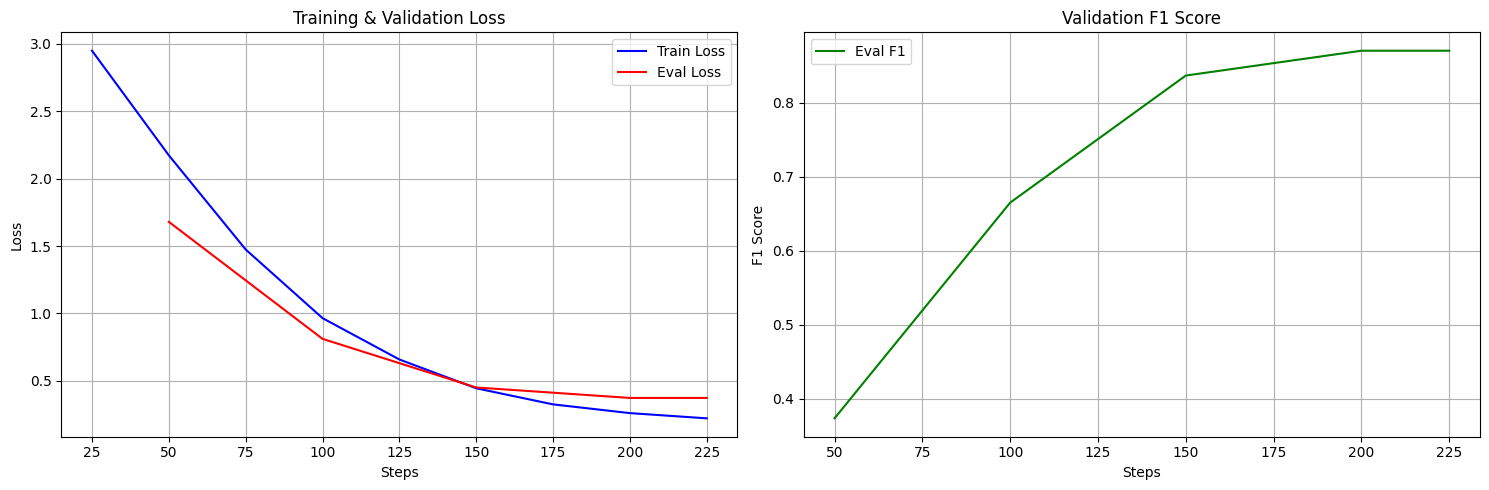

In [14]:
print("\nüìä Final evaluation yapƒ±lƒ±yor...")

# Evaluation
eval_results = trainer.evaluate()

print("üéØ EVALUATION SONU√áLARI:")
for key, value in eval_results.items():
    if key.startswith('eval_'):
        metric_name = key.replace('eval_', '').upper()
        print(f"  ‚Ä¢ {metric_name}: {value:.4f}")

# Training history g√∂rselle≈ütirme
def plot_training_history():
    """Training history'yi √ßiz"""
    # Log history'den metrics √ßƒ±kar
    log_history = trainer.state.log_history

    train_loss = []
    eval_loss = []
    eval_f1 = []
    steps = []

    for log in log_history:
        if 'loss' in log and 'eval_loss' not in log:
            train_loss.append(log['loss'])
            steps.append(log['step'])
        elif 'eval_loss' in log:
            eval_loss.append(log['eval_loss'])
            eval_f1.append(log['eval_f1'])

    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Loss plot
    ax1.plot(steps, train_loss, label='Train Loss', color='blue')
    if eval_loss:
        eval_steps = [log['step'] for log in log_history if 'eval_loss' in log]
        ax1.plot(eval_steps, eval_loss, label='Eval Loss', color='red')
    ax1.set_xlabel('Steps')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training & Validation Loss')
    ax1.legend()
    ax1.grid(True)

    # F1 plot
    if eval_f1:
        eval_steps = [log['step'] for log in log_history if 'eval_f1' in log]
        ax2.plot(eval_steps, eval_f1, label='Eval F1', color='green')
        ax2.set_xlabel('Steps')
        ax2.set_ylabel('F1 Score')
        ax2.set_title('Validation F1 Score')
        ax2.legend()
        ax2.grid(True)

    plt.tight_layout()
    plt.show()

plot_training_history()

In [21]:
def predict_pos_tags(text, show_confidence=False):
   """Yeni metin i√ßin POS tagging yap"""

   # Text'i kelimelerine ayƒ±r
   words = text.split()

   # Tokenize
   encoded = tokenizer(
       words,
       is_split_into_words=True,
       padding=True,
       truncation=True,
       return_tensors='pt'
   )

   # Word alignment - tokenization sƒ±rasƒ±nda al
   word_ids = encoded.word_ids()

   # GPU'ya ta≈üƒ±
   encoded = {k: v.to(device) for k, v in encoded.items()}

   # Predict
   model.eval()
   with torch.no_grad():
       outputs = model(**encoded)
       predictions = torch.softmax(outputs.logits, dim=-1)
       predicted_ids = torch.argmax(predictions, dim=-1)

   # Word alignment ile labels olu≈ütur
   predicted_labels = []
   confidences = []

   word_idx = 0
   for i, word_id in enumerate(word_ids):
       if word_id is not None and word_idx < len(words):
           label_id = predicted_ids[0][i].item()
           confidence = predictions[0][i][label_id].item()

           predicted_labels.append(processor.id2tag[label_id])
           confidences.append(confidence)
           word_idx += 1

   # Results
   results = list(zip(words[:len(predicted_labels)], predicted_labels))

   if show_confidence:
       results_with_conf = [(word, tag, conf) for (word, tag), conf in zip(results, confidences)]
       return results_with_conf

   return results

# Test c√ºmleleri
test_sentences = [
   "ben bug√ºn okula gidiyorum",
   "annem √ßok g√ºzel yemek yapƒ±yor",
   "arkada≈üƒ±mla sinemaya gideceƒüiz",
   "kitap okumayƒ± √ßok seviyorum",
   "hava bug√ºn √ßok g√ºzel",
   "teknoloji hƒ±zla geli≈üiyor",
   "futbol oynamayƒ± seviyorum"
]

print("\nüîç MODEL TEST SONU√áLARI:")
print("=" * 80)

for i, text in enumerate(test_sentences, 1):
   predictions = predict_pos_tags(text, show_confidence=True)

   print(f"\n{i}. C√ºmle: '{text}'")
   print("   Sonu√ß:")
   for word, tag, conf in predictions:
       print(f"     {word:15} -> {tag:10} (g√ºven: {conf:.3f})")


üîç MODEL TEST SONU√áLARI:

1. C√ºmle: 'ben bug√ºn okula gidiyorum'
   Sonu√ß:
     ben             -> Pron       (g√ºven: 0.361)
     bug√ºn           -> Adv        (g√ºven: 0.827)
     okula           -> Noun_Dat   (g√ºven: 0.904)
     gidiyorum       -> Verb       (g√ºven: 0.732)

2. C√ºmle: 'annem √ßok g√ºzel yemek yapƒ±yor'
   Sonu√ß:
     annem           -> Noun_Nom   (g√ºven: 0.956)
     √ßok             -> Adv        (g√ºven: 0.887)
     g√ºzel           -> Adj        (g√ºven: 0.753)
     yemek           -> Noun_Acc   (g√ºven: 0.938)
     yapƒ±yor         -> Verb       (g√ºven: 0.951)

3. C√ºmle: 'arkada≈üƒ±mla sinemaya gideceƒüiz'
   Sonu√ß:
     arkada≈üƒ±mla     -> Noun_Loc   (g√ºven: 0.232)
     sinemaya        -> Noun_Loc   (g√ºven: 0.197)
     gideceƒüiz       -> Noun_Dat   (g√ºven: 0.922)

4. C√ºmle: 'kitap okumayƒ± √ßok seviyorum'
   Sonu√ß:
     kitap           -> Noun_Acc   (g√ºven: 0.983)
     okumayƒ±         -> Verb       (g√ºven: 0.988)
     √ßok             -> 

In [17]:
# Model ve tokenizer'ƒ± kaydet
output_dir = "./bertturk_pos_final_model"
trainer.save_model(output_dir)
tokenizer.save_pretrained(output_dir)

# Metadata kaydet
metadata = {
    'pos_tags': processor.pos_tags,
    'tag2id': processor.tag2id,
    'id2tag': processor.id2tag,
    'eval_results': eval_results,
    'training_args': {
        'epochs': training_args.num_train_epochs,
        'batch_size': training_args.per_device_train_batch_size,
        'learning_rate': training_args.learning_rate,
    }
}

with open(f"{output_dir}/metadata.json", 'w', encoding='utf-8') as f:
    json.dump(metadata, f, ensure_ascii=False, indent=2)

print(f"\nüíæ Model kaydedildi: {output_dir}")
print("üìÅ Kaydedilen dosyalar:")
print("  ‚Ä¢ pytorch_model.bin (model weights)")
print("  ‚Ä¢ config.json (model config)")
print("  ‚Ä¢ tokenizer files")
print("  ‚Ä¢ metadata.json (POS tags ve sonu√ßlar)")


üíæ Model kaydedildi: ./bertturk_pos_final_model
üìÅ Kaydedilen dosyalar:
  ‚Ä¢ pytorch_model.bin (model weights)
  ‚Ä¢ config.json (model config)
  ‚Ä¢ tokenizer files
  ‚Ä¢ metadata.json (POS tags ve sonu√ßlar)


In [18]:
print("\nüì¶ MODEL Y√úKLEME VE KULLANIM √ñRNEƒûƒ∞:")
print("=" * 50)

# Saved model'i y√ºkle (test i√ßin)
def load_saved_model(model_path):
    """Kaydedilen modeli y√ºkle"""

    # Metadata y√ºkle
    with open(f"{model_path}/metadata.json", 'r', encoding='utf-8') as f:
        metadata = json.load(f)

    # Model ve tokenizer y√ºkle
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForTokenClassification.from_pretrained(model_path)

    # GPU'ya ta≈üƒ±
    if torch.cuda.is_available():
        model.to('cuda')

    return model, tokenizer, metadata

# Test y√ºkleme
try:
    loaded_model, loaded_tokenizer, metadata = load_saved_model(output_dir)
    print("‚úÖ Model ba≈üarƒ±yla y√ºklendi!")

    # Test prediction with loaded model
    test_text = "yarƒ±n arkada≈üƒ±mla bulu≈üacaƒüƒ±m"
    # ... (prediction kodu)

except Exception as e:
    print(f"‚ùå Model y√ºkleme hatasƒ±: {e}")

print("\nüéâ COLAB NOTEBOOK TAMAMLANDI!")
print("=" * 50)
print("‚úÖ Model ba≈üarƒ±yla eƒüitildi ve kaydedildi")
print("üìä Performance metrikleri hesaplandƒ±")
print("üîç Test predictions yapƒ±ldƒ±")
print("üíæ Model production i√ßin hazƒ±r!")

# Colab'da dosyalarƒ± indirmek i√ßin
print("\nüì• Modeli bilgisayarƒ±nƒ±za indirmek i√ßin:")
print("1. Sol panelden 'Files' sekmesini a√ßƒ±n")
print("2. 'bertturk_pos_final_model' klas√∂r√ºn√º bulun")
print("3. Saƒü tƒ±klayƒ±p 'Download' se√ßin")
print("4. ZIP dosyasƒ± indirilecek")

# Son √∂zet
print(f"\nüìà SON √ñZET:")
print(f"  ‚Ä¢ Eƒüitilen c√ºmle sayƒ±sƒ±: {len(train_sentences)}")
print(f"  ‚Ä¢ Test edilen c√ºmle sayƒ±sƒ±: {len(eval_sentences)}")
print(f"  ‚Ä¢ Final F1 Score: {eval_results.get('eval_f1', 0):.4f}")
print(f"  ‚Ä¢ Final Accuracy: {eval_results.get('eval_accuracy', 0):.4f}")
print(f"  ‚Ä¢ Model boyutu: ~400MB")
print(f"  ‚Ä¢ Eƒüitim s√ºresi: ~10-15 dakika (GPU ile)")


üì¶ MODEL Y√úKLEME VE KULLANIM √ñRNEƒûƒ∞:
‚úÖ Model ba≈üarƒ±yla y√ºklendi!

üéâ COLAB NOTEBOOK TAMAMLANDI!
‚úÖ Model ba≈üarƒ±yla eƒüitildi ve kaydedildi
üìä Performance metrikleri hesaplandƒ±
üîç Test predictions yapƒ±ldƒ±
üíæ Model production i√ßin hazƒ±r!

üì• Modeli bilgisayarƒ±nƒ±za indirmek i√ßin:
1. Sol panelden 'Files' sekmesini a√ßƒ±n
2. 'bertturk_pos_final_model' klas√∂r√ºn√º bulun
3. Saƒü tƒ±klayƒ±p 'Download' se√ßin
4. ZIP dosyasƒ± indirilecek

üìà SON √ñZET:
  ‚Ä¢ Eƒüitilen c√ºmle sayƒ±sƒ±: 718
  ‚Ä¢ Test edilen c√ºmle sayƒ±sƒ±: 180
  ‚Ä¢ Final F1 Score: 0.8706
  ‚Ä¢ Final Accuracy: 0.8965
  ‚Ä¢ Model boyutu: ~400MB
  ‚Ä¢ Eƒüitim s√ºresi: ~10-15 dakika (GPU ile)
